# SC1015 Project: Breast cancer prediction

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

csv = pd.read_csv("breast-cancer-wisconsin-data.csv")
display(csv.head())
display(csv.info())

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

None

After analysing the dataset from the csv file:
* There are `32` variables/features/columns and `569` observations/samples/rows in the dataset. 
* The response variable seems to be `diagnosis`, containing the value M - Malignant and B - Benign 
* `id` seems to be an irrelevant variable while the remaining 30 are most likely predictors.     
* There are `30` variables (excluding id) identified as `float64` by default, and it seems they are indeed Numeric.     
* There are `1` variables identified as `object` by default, and they are most likely Categorical.      
* None of the variables/features seem to have any missing value

In [2]:
data = csv.drop('id', axis = 1)
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

---
# Exploratory Data Analysis (EDA)

In [3]:
data.describe().T

count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave points_se        569.0    0.011796    0.006170    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave points_worst     569.0    0.114606    0.065732    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.170000   86.240000   104.100000   188.50000  
area_mean                420.300000  551.100000   782.700000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.029560    0.061540     0.130700     0.42680  
concave points_mean        0.020310    0.033500     0.074000     0.20120  
symmetry_mean              0.161900    0.179200     0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900     2.87300  
texture_se                 0.833900    1.108000     1.474000     4.88500  
perimeter_se               1.606000    2.287000     3.357000    21.98000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015090    0.025890     0.042050     0.39600  
concave points_se          0.007638    0.010930     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187     0.004558     0.02984  
radius_worst              13.010000   14.970000    18.790000    36.04000  
texture_worst             21.080000   25.410000    29.720000    49.54000  
perimeter_worst           84.110000   97.660000   125.400000   251.20000  
area_worst               515.300000  686.500000  1084.

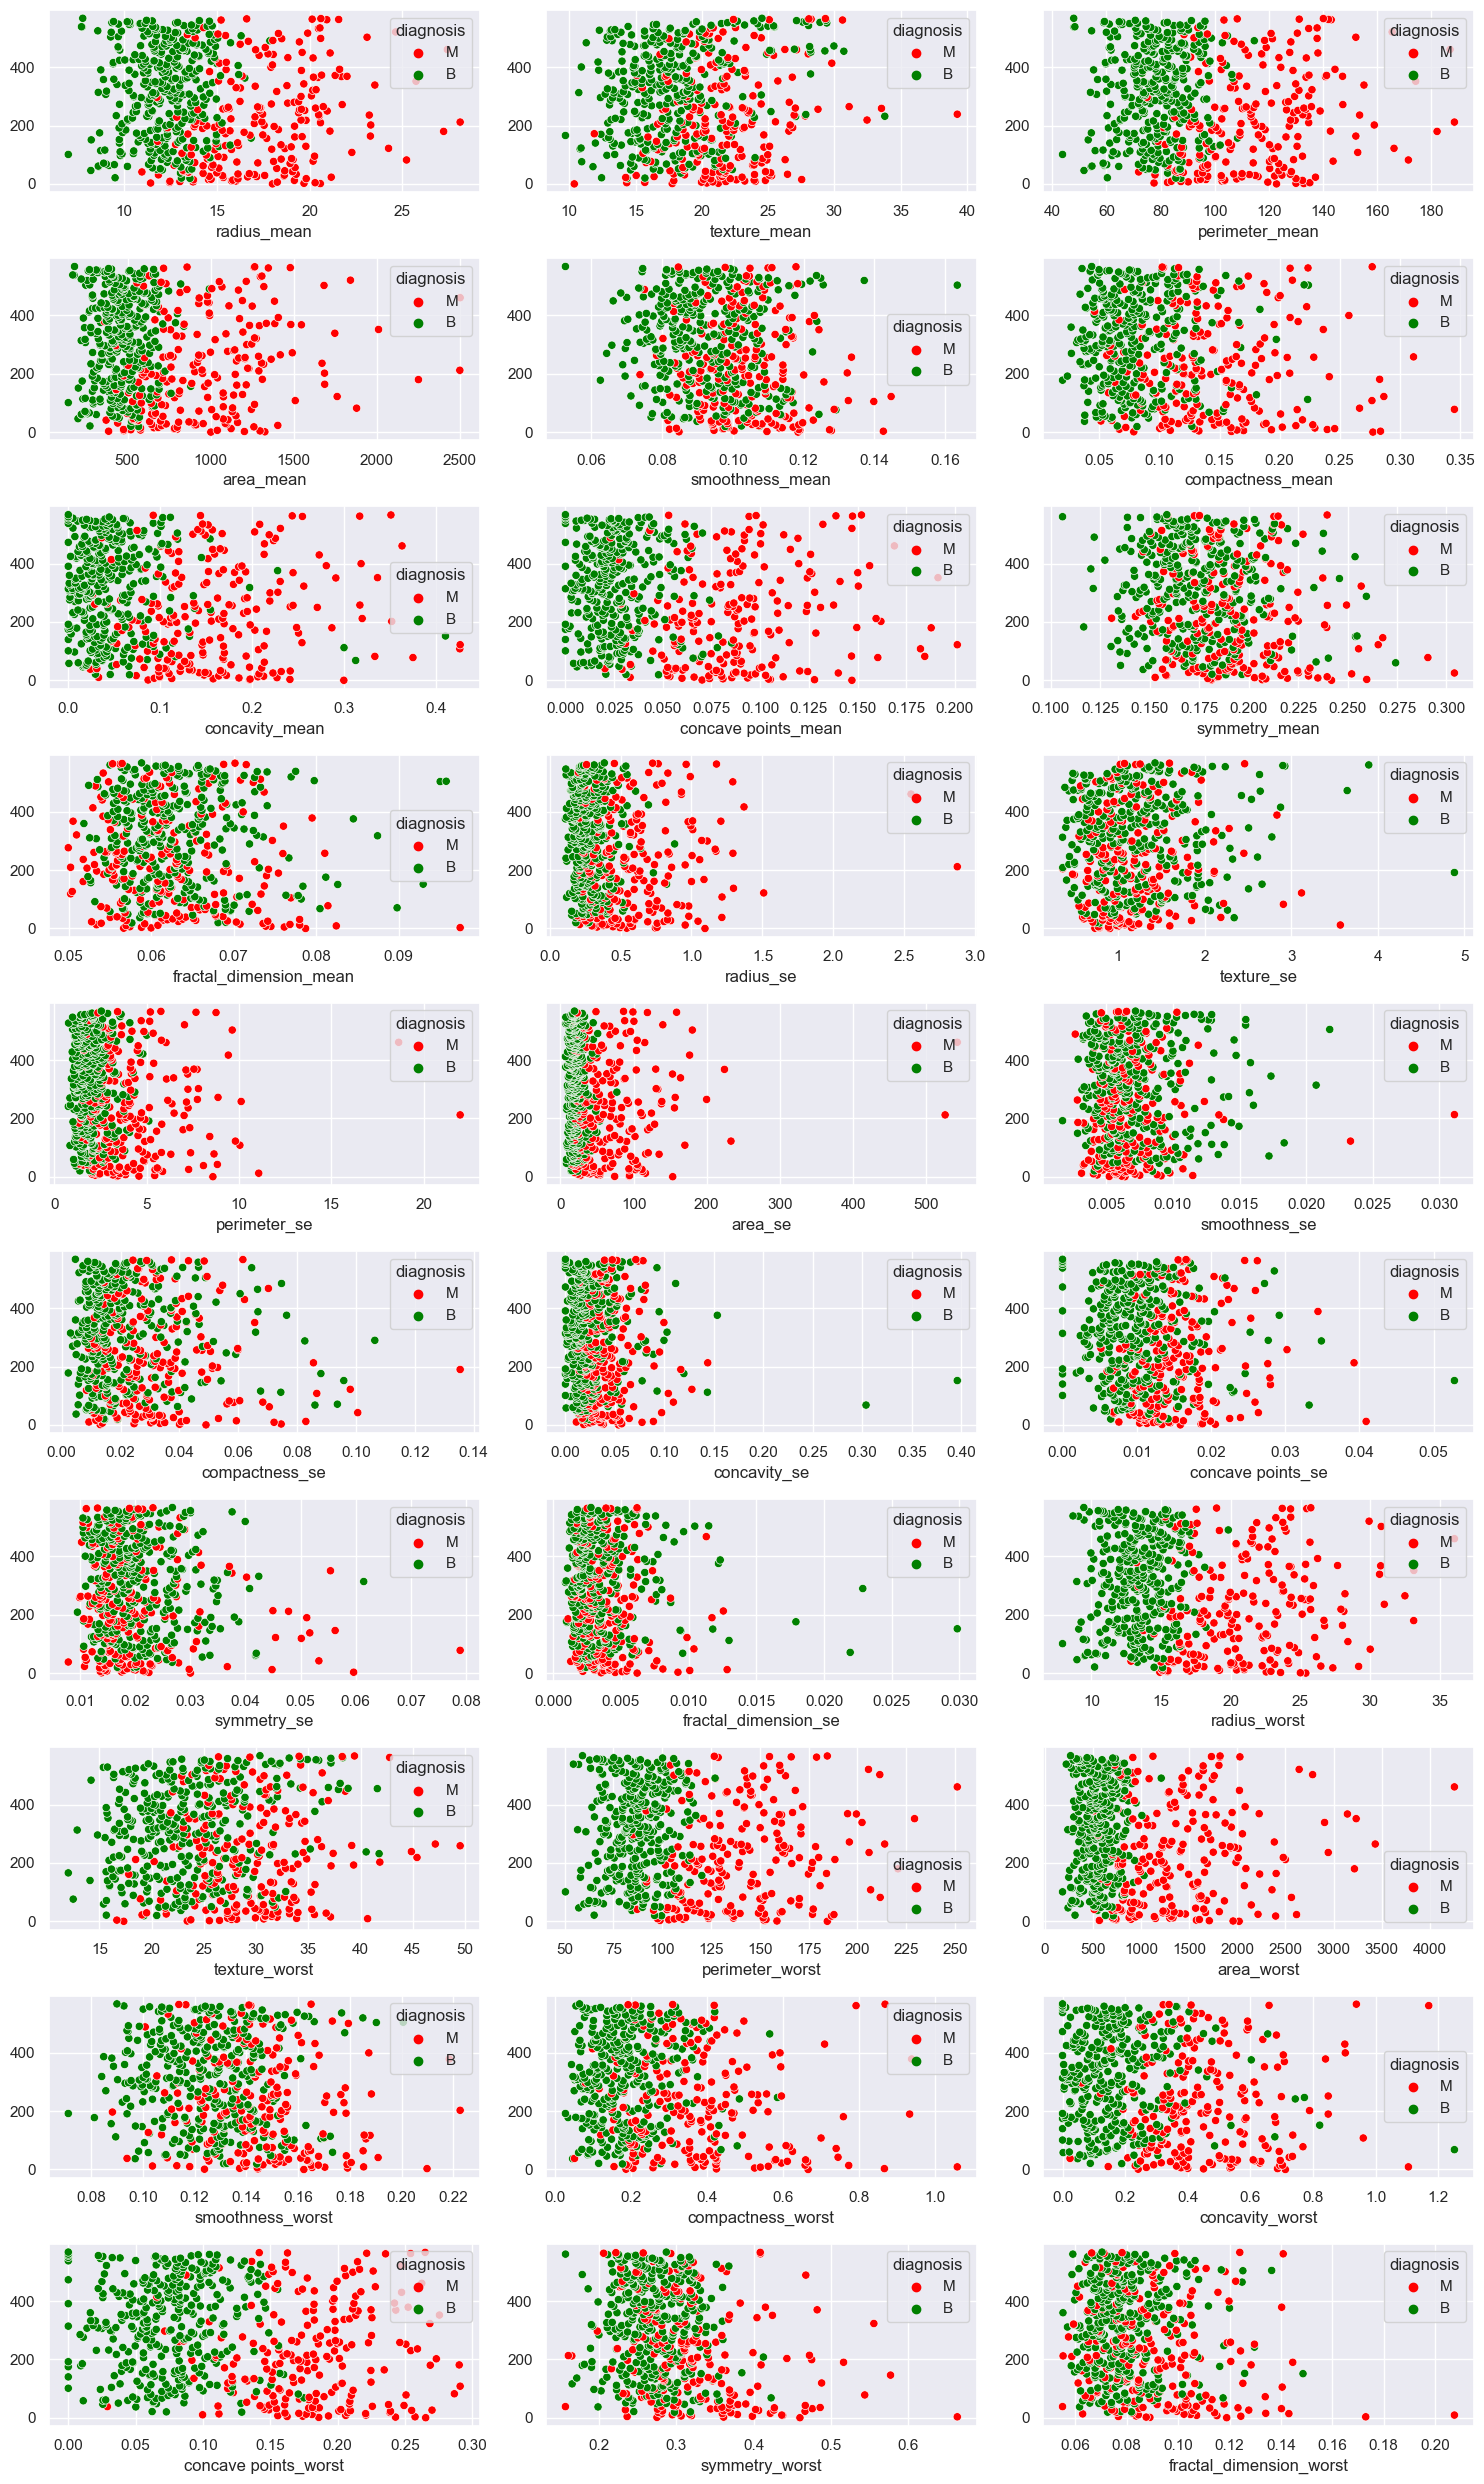

In [4]:
fig, axes = plt.subplots(10, 3, figsize=(15, 25))
axes = axes.flatten()
for i, column in enumerate(data.columns[1:]):
    sb.scatterplot(data = data, x = data[column], y = data.index, hue = 'diagnosis', palette = ['red','green'], ax = axes[i])
plt.tight_layout()

Below shows the different scatter plotos for each feature in the data

Each colour represents the diagnosis and the scatter plot shows the distribution of the diagnosis across each feature

Based on these scatter plots, visually we can identify certain features are better than others when predicting the diagnosis. 

Namely, 
* radius_mean
* perimeter_mean
* area_mean
* concave points_mean
* radius_worst
* perimeter_worst
* area_worst
* concave points_worst

However, this is through visual comparison of the different plots. The use of numeric data to compare features may be a better way of identifying which features are best. 

Hence, we will also be using feature_scores in conjunction with the scatterplots to identify which features are best to use. 


 ## Outliers Detection
Outlier detection is the first step of EDA, we should observe the impact of outliers on our dataset and decide how to handle them. We'll try two methods `IQR` and `Z-score`. Since our response variable is a dichotomous categorical variable, we can convert it into a numerical variable for easier usage

In [5]:
data_Int = pd.DataFrame(data)
data_Int['diagnosis'] = (data_Int['diagnosis'] == 'M').astype(int)
data_Int.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

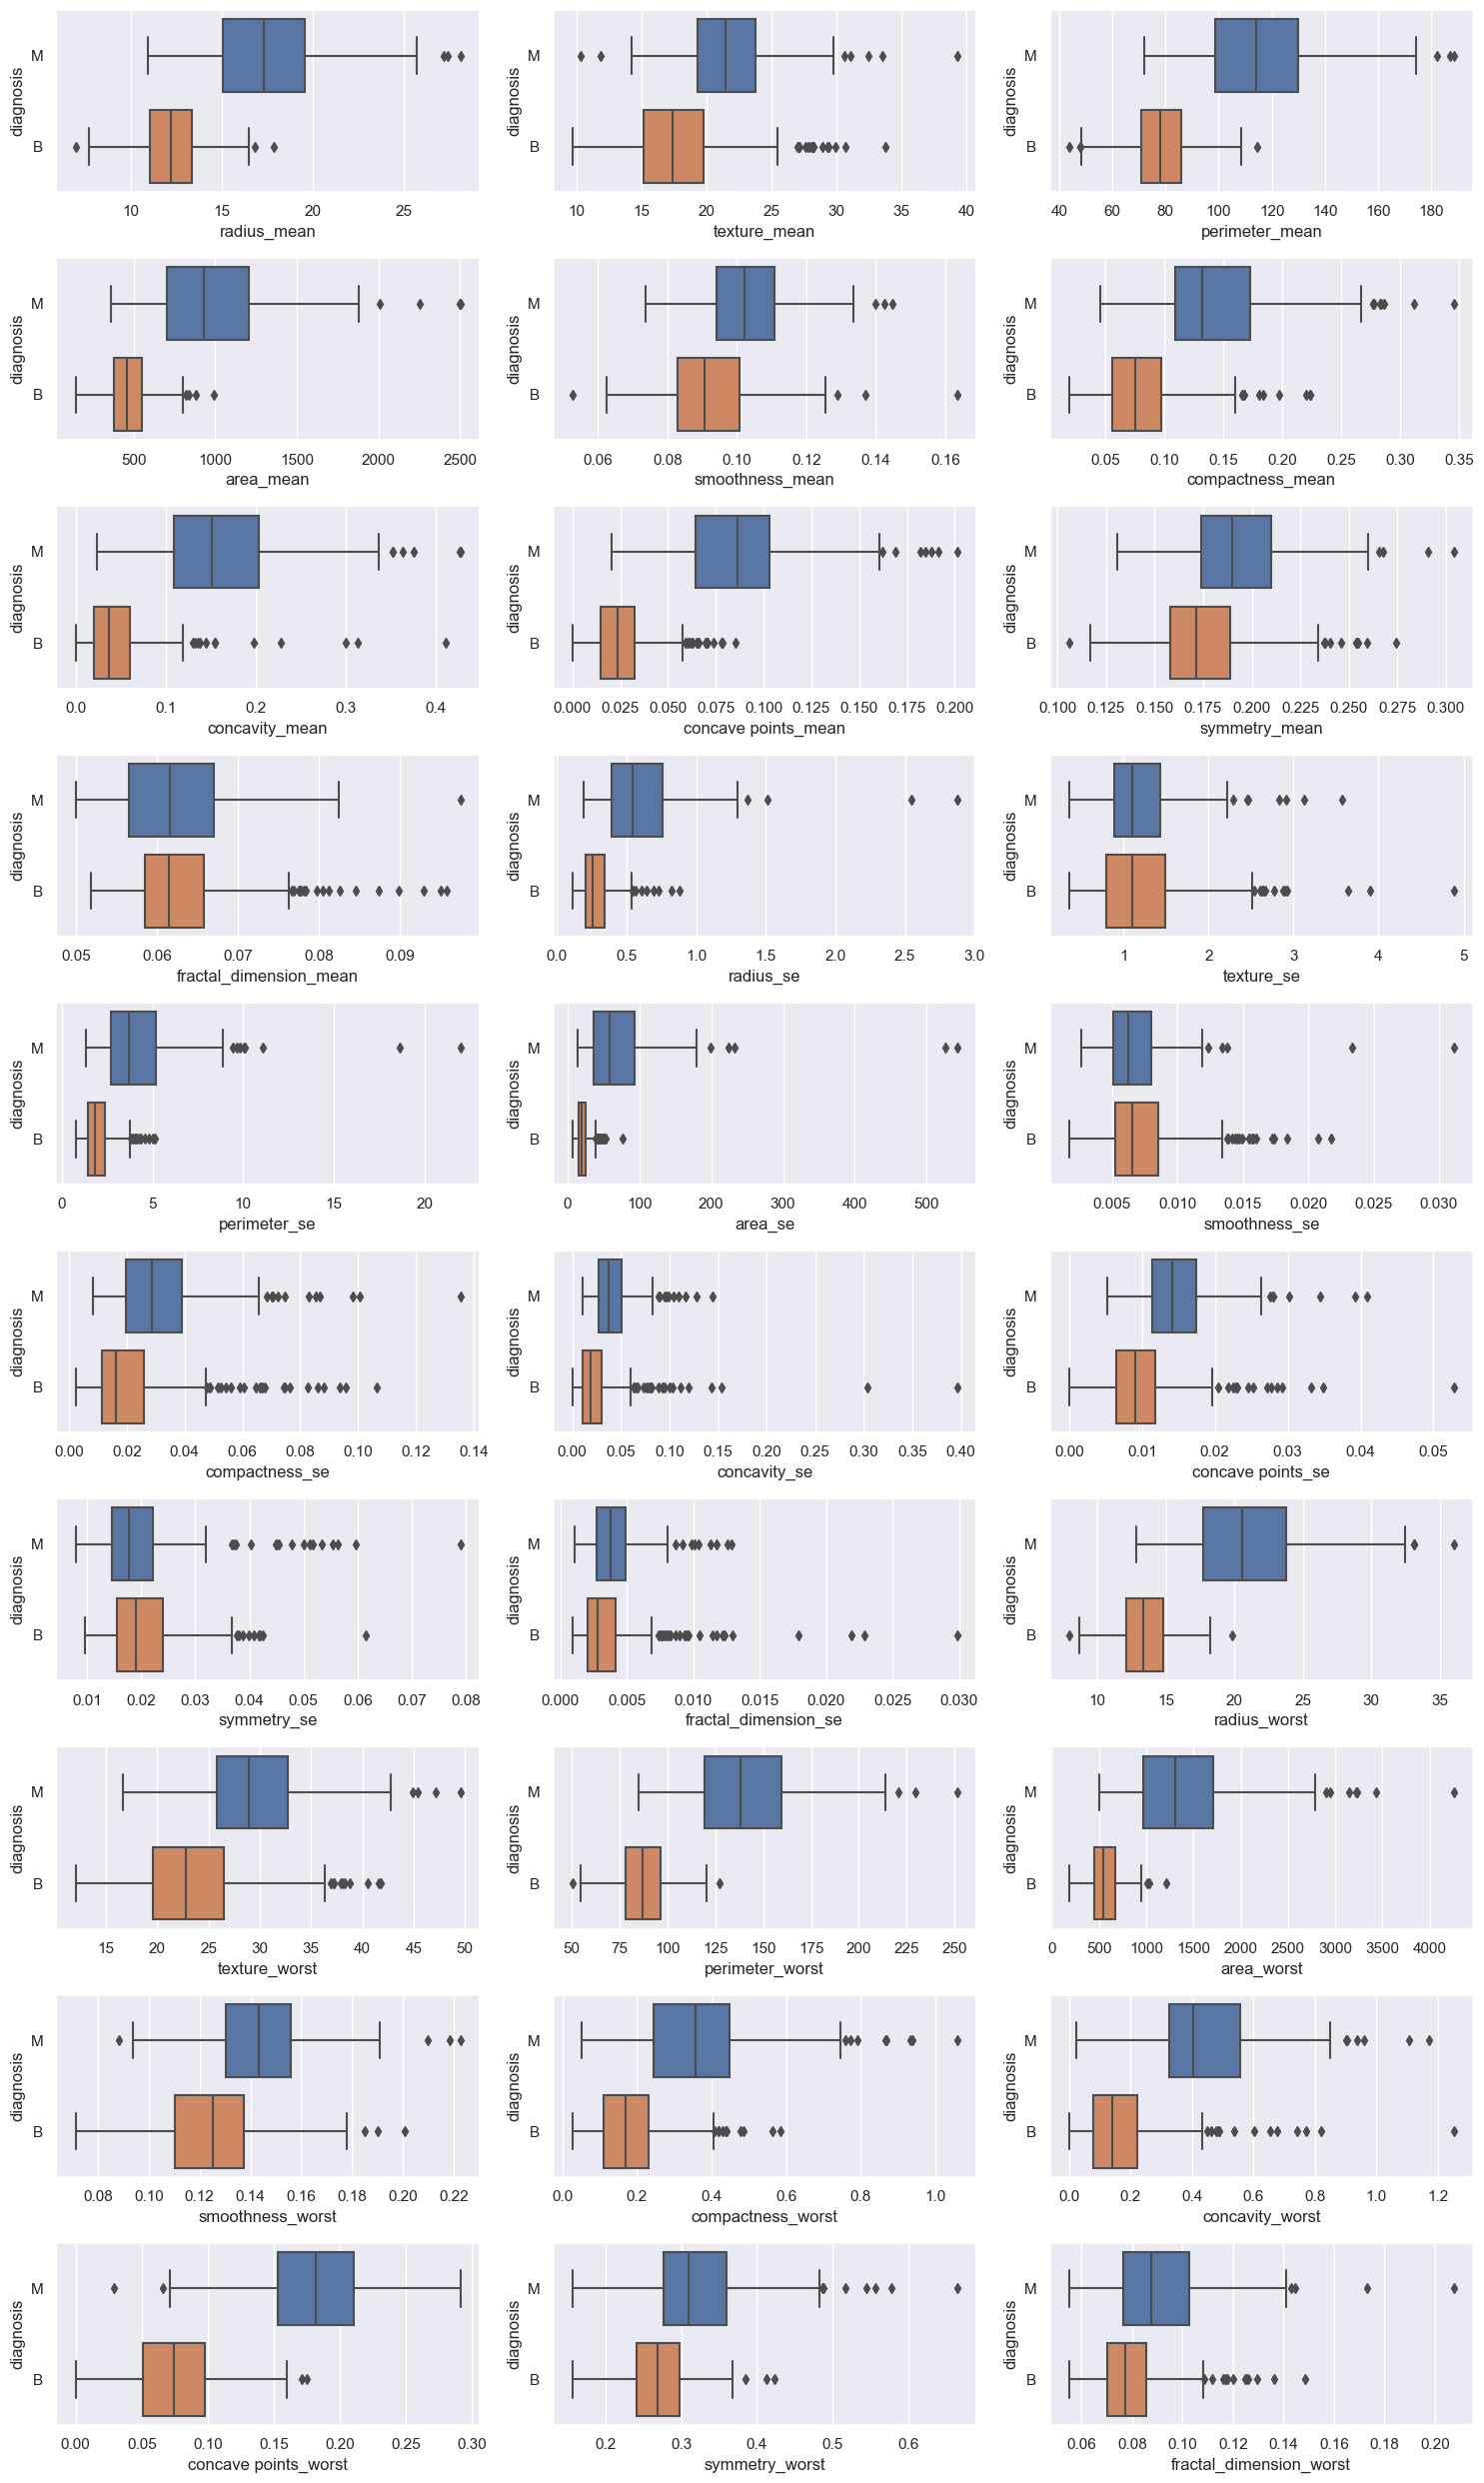

In [6]:
fig, axes = plt.subplots(10, 3, figsize=(15, 25))
axes = axes.flatten()
for i, var in enumerate(data.columns[1:]):
    sb.boxplot(x=var, y='diagnosis', data=data, ax=axes[i])
plt.tight_layout()

<Axes: >

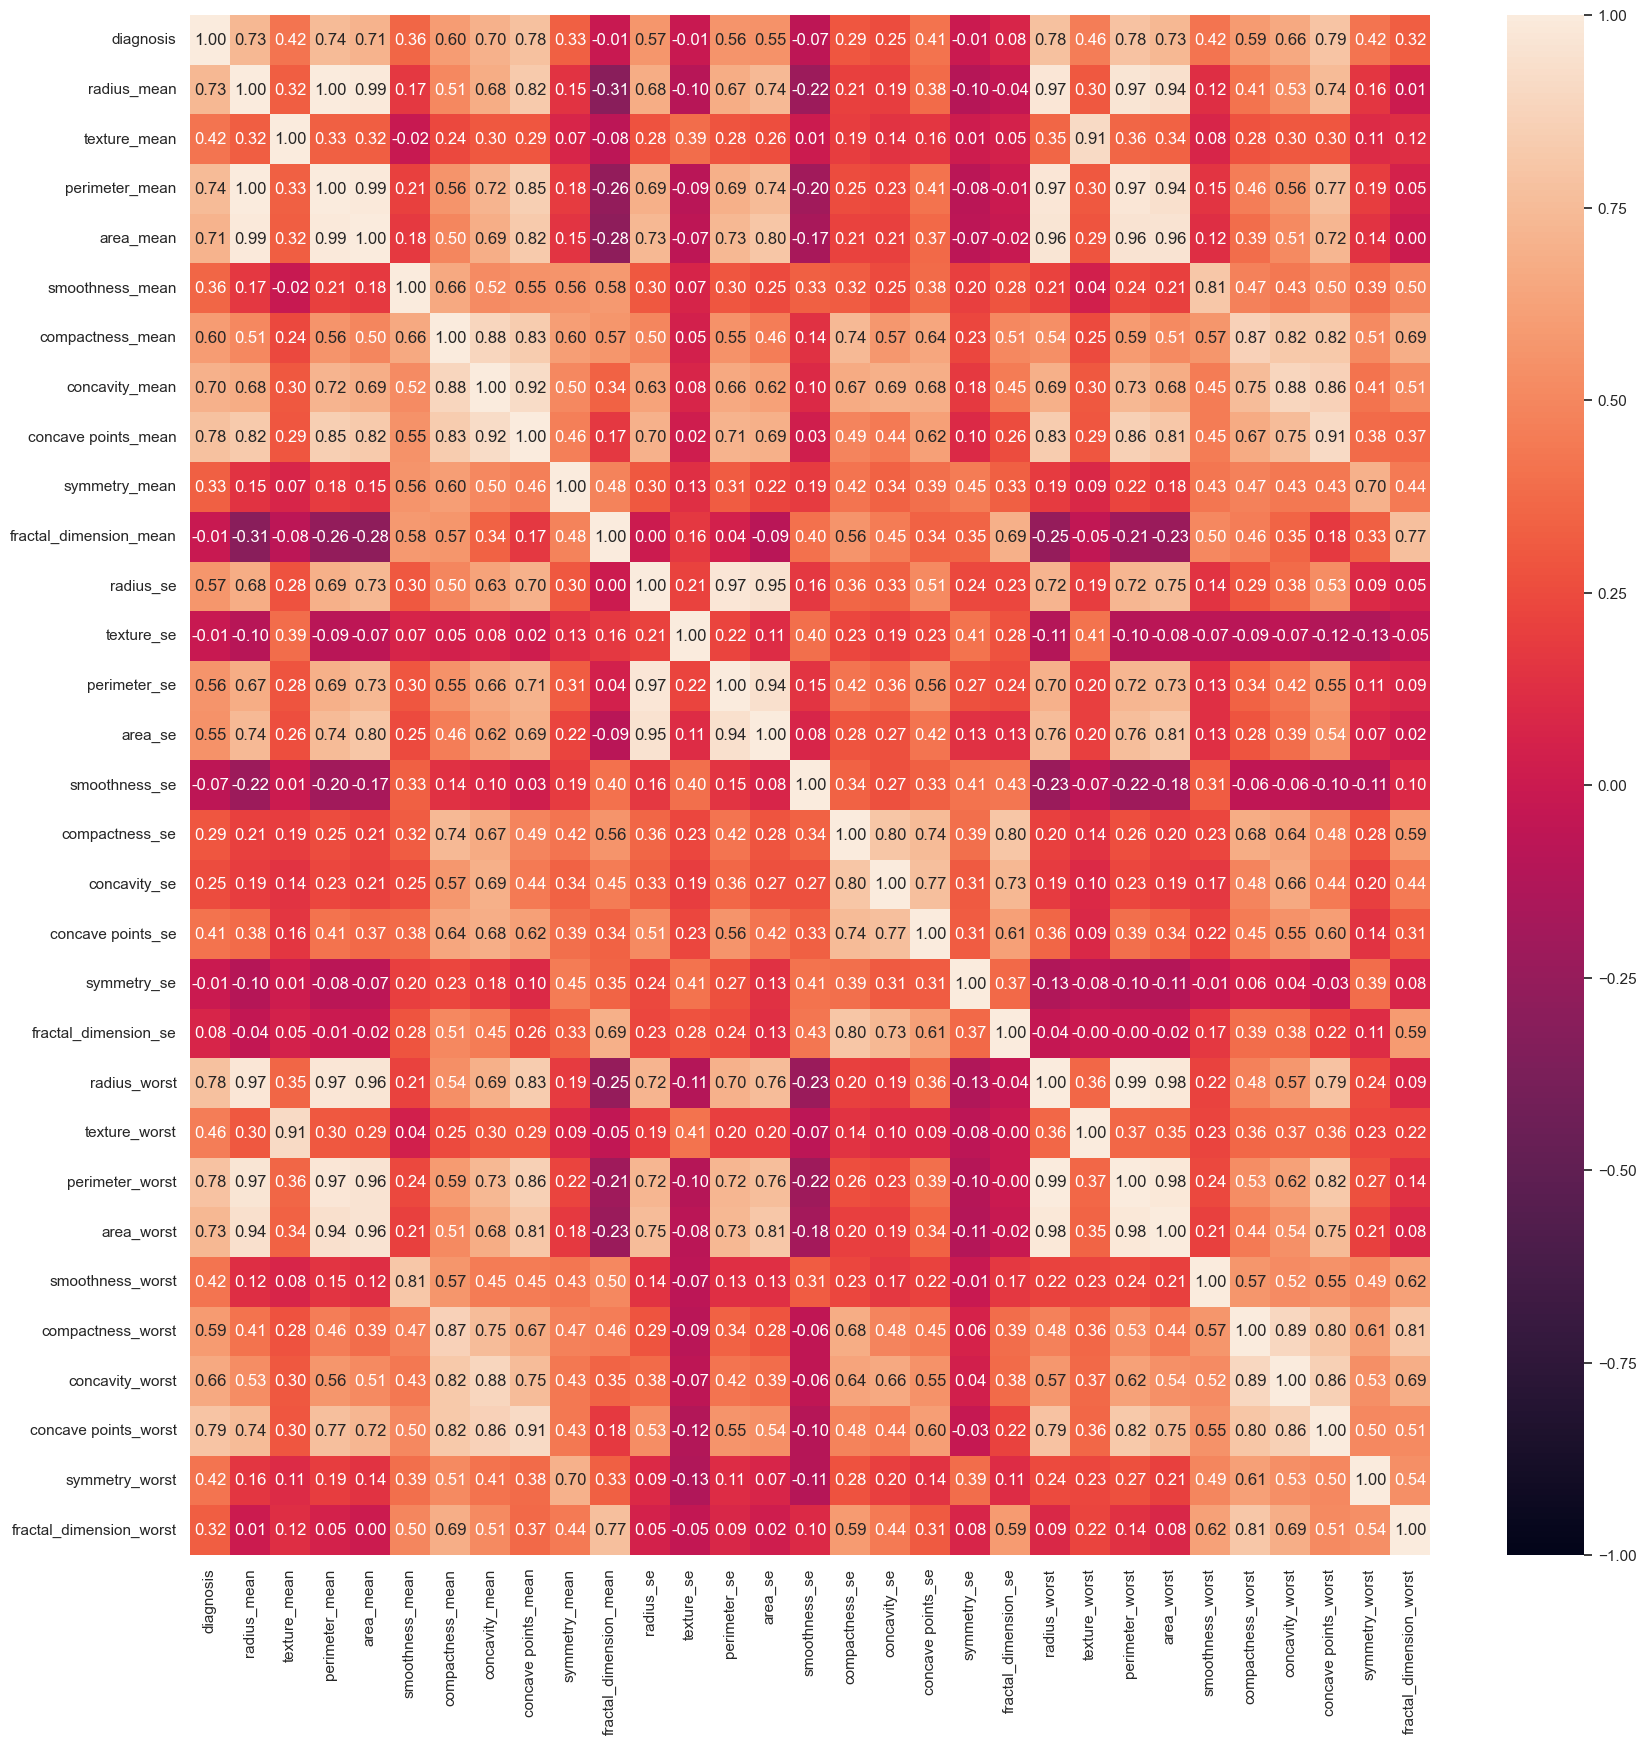

In [7]:
f = plt.figure(figsize=(20, 20))
sb.heatmap(data_Int.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

<Axes: >

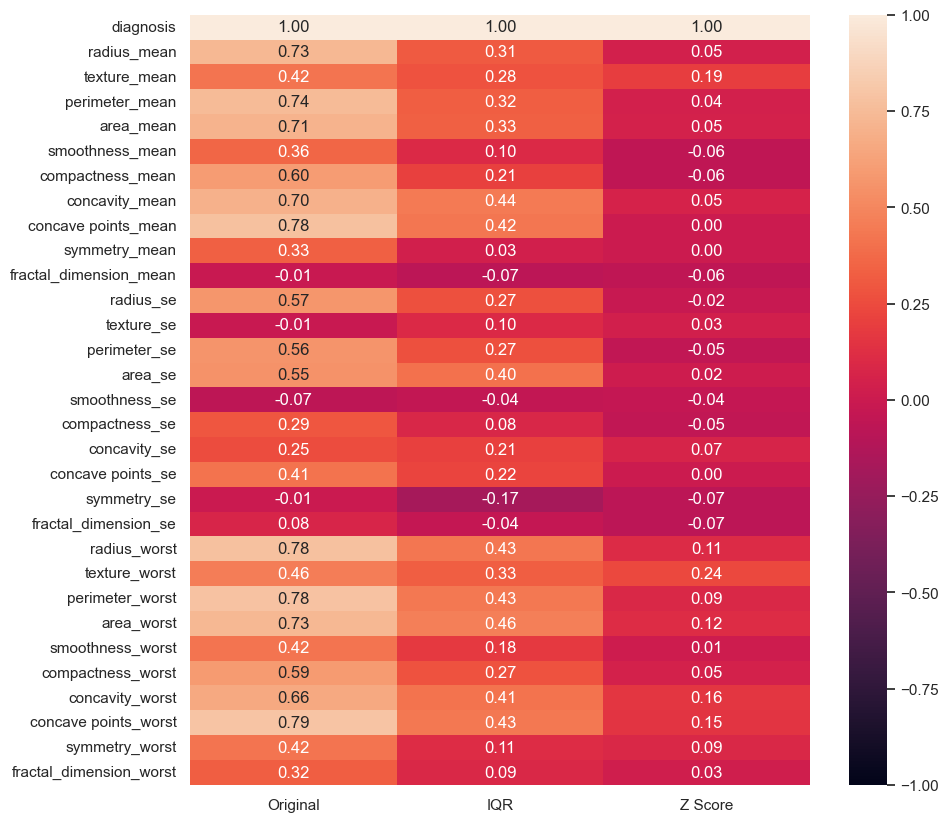

In [8]:
from scipy import stats
data_IQR = pd.DataFrame(data_Int)
data_IQR.columns = data.columns
for var in data_IQR.columns[1:]:
    Q1 = data_IQR[var].quantile(0.25)
    Q3 = data_IQR[var].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    data_IQR = data_IQR[(data_IQR[var]>=lower) & (data_IQR[var]<=upper)]
    
data_Z = pd.DataFrame(data_Int)
data_Z.columns = data.columns
for var in data_Z.columns[1:]:
    z = np.abs(stats.zscore(data_Z[var]))
    data_Z = data_Z[z<2]
    
corrDF = pd.concat([data_Int.corr()['diagnosis'], data_IQR.corr()['diagnosis'], data_Z.corr()['diagnosis']], keys = ['Original', 'IQR', 'Z Score'], axis = 1)
f = plt.figure(figsize=(10, 10))
sb.heatmap(corrDF, vmin = -1, vmax = 1, annot = True, fmt=".2f")

We can observe from the correlation table above that by removing our outliers, the `correlation decreases` and useful data points were lost. Specifically for this subject, abnormalies actually provide meaningful informations and increases the variability of our models. It should be considered that the `threshold` value for `IQR = 1.5` and `Z Score = 2` were fixed and perhaps there exist some threshold value where the correlation would actually increase.

With this in mind, we will be proceeding with the `original` dataset.

## Data Balancing
In this section, we have to observe whether `upsampling` is required. Ideally, we would want the original response data to have equal probability `50:50`. However, this is ever the case. Thus upsampling would help equalize the probabilities of our response variable and eliminate the skewness.

One thing to consider was when to upsample, either before or after `train_test_split`.

C:\Users\thuva\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


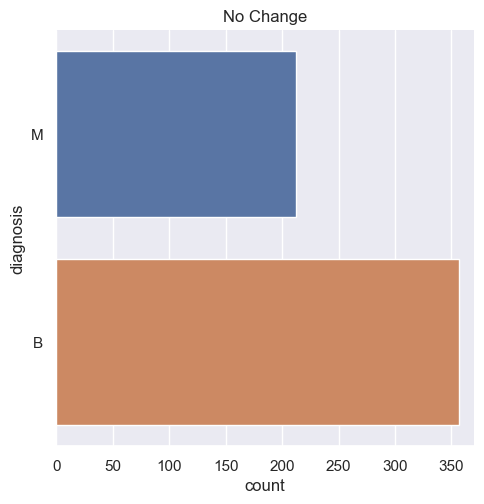

diagnosis
B    357
M    212
Name: count, dtype: int64

C:\Users\thuva\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


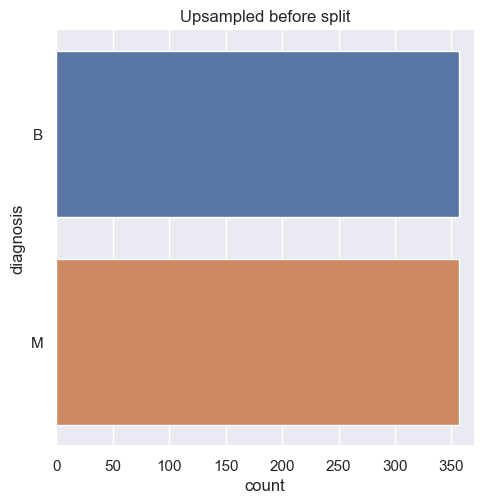

diagnosis
B    357
M    357
Name: count, dtype: int64

C:\Users\thuva\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


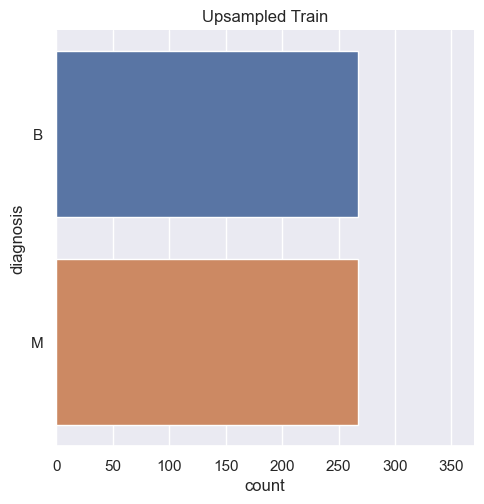

diagnosis
B    267
M    267
Name: count, dtype: int64

C:\Users\thuva\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


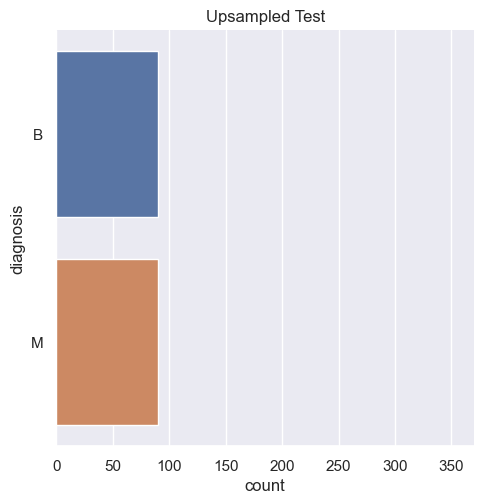

diagnosis
B    90
M    90
Name: count, dtype: int64

In [9]:
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

estimator = DecisionTreeClassifier()
accuracy = pd.DataFrame(columns = ["Train", "Test"])

#==================================================================#
sb.catplot(y = 'diagnosis', data = data, kind = "count").set(title="No Change")
plt.xlim(0, 370)
plt.show()
display(data['diagnosis'].value_counts())

x = data.drop('diagnosis', axis = 1)
y = data['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 29)
estimator.fit(x_train, y_train)
result = pd.DataFrame([[estimator.score(x_train, y_train), estimator.score(x_test, y_test)]], index = ["Original"], columns = ["Train", "Test"])
accuracy = pd.concat([accuracy, result])

#==================================================================#
diagBenign = data[data.diagnosis == 'B']
diagMalignant = data[data.diagnosis == 'M']

diagMalignant_up = resample(diagMalignant, replace = True, n_samples = diagBenign.shape[0], random_state = 45)
data_up = pd.concat([diagBenign, diagMalignant_up])
sb.catplot(y = 'diagnosis', data = data_up, kind = "count").set(title="Upsampled before split")
plt.xlim(0, 370)
plt.show()
display(data_up['diagnosis'].value_counts())

x = data_up.drop('diagnosis', axis = 1)
y = data_up['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 29)
estimator.fit(x_train, y_train)
result = pd.DataFrame([[estimator.score(x_train, y_train), estimator.score(x_test, y_test)]], index = ["Upsample Before"], columns = ["Train", "Test"])
accuracy = pd.concat([accuracy, result])

#==================================================================#
train, test = train_test_split(data, test_size = 0.25, random_state = 29)
trainB = train[train.diagnosis == 'B']
trainM = train[train.diagnosis == 'M']
trainM_up = resample(trainM, replace = True, n_samples = trainB.shape[0], random_state = 45)
train_up = pd.concat([trainB, trainM_up])
sb.catplot(y = 'diagnosis', data = train_up, kind = "count").set(title="Upsampled Train")
plt.xlim(0, 370)
plt.show()
display(train_up['diagnosis'].value_counts())

testB = test[test.diagnosis == 'B']
testM = test[test.diagnosis == 'M']
testM_up = resample(testM, replace = True, n_samples = testB.shape[0], random_state = 45)
test_up = pd.concat([testB, testM_up])
sb.catplot(y = 'diagnosis', data = test_up, kind = "count").set(title="Upsampled Test")
plt.xlim(0, 370)
plt.show()
display(test_up['diagnosis'].value_counts())

x_train = train_up.drop('diagnosis', axis = 1)
y_train = train_up['diagnosis']
x_test = test_up.drop('diagnosis', axis = 1)
y_test = test_up['diagnosis']
estimator.fit(x_train, y_train)
result = pd.DataFrame([[estimator.score(x_train, y_train), estimator.score(x_test, y_test)]], index = ["Upsample After"], columns = ["Train", "Test"])
accuracy = pd.concat([accuracy, result])

In [10]:
display(accuracy)

Train      Test
Original           1.0  0.923077
Upsample Before    1.0  0.966480
Upsample After     1.0  0.894444

Interestingly, it seems that upsampling `before` train_test_split provides greater accuracy. It should still be considered that this accuracy was modeled with a decision tree and the train/test data would vary with every dataset. However, we will continue to proceed with the data `Upsample Before` the split.

## Feature Selection
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import r_regression
#from sklearn.feature_selection import mutual_info_classif

data_up_int = data_up
data_up_int['diagnosis'] = (data_up_int['diagnosis'] == 'M').astype(int)

y = data_up_int['diagnosis'] #Our target/what we want to predict
X = data_up_int.drop('diagnosis', axis = 1)     #taking all the columns except the target

features = pd.DataFrame(X.columns, columns = ['Features'])
f_scores = pd.DataFrame(SelectKBest(score_func = f_classif, k = 10).fit(X, y).scores_, columns = ['F_Scores'])
abs_corr = pd.DataFrame(abs(r_regression(X, y)), columns = ['Abs_Corr'])

features = pd.concat([features, f_scores, abs_corr], axis = 1)
features.sort_values(by='F_Scores', ascending = False).style.background_gradient(cmap='Reds')

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

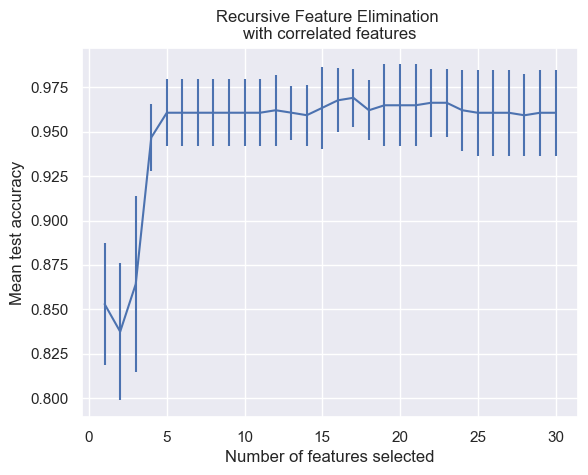

In [12]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

y = data_up_int['diagnosis'] #Our target/what we want to predict
X = data_up_int.drop('diagnosis', axis = 1)     #taking all the columns except the target

min_features_to_select = 1  # Minimum number of features to consider
clf = LogisticRegression(max_iter=5000)
cv = StratifiedKFold(10)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X, y)

#print(f"Optimal number of features: {rfecv.n_features_}")

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [13]:
feature_list = [['concave points_worst', 'perimeter_worst', 'radius_worst', 'concave points_mean', 'perimeter_mean', 'radius_mean', 'area_worst'],
                ['concave points_worst', 'perimeter_worst', 'radius_worst', 'concave points_mean', 'perimeter_mean'],
                ['concave points_worst', 'perimeter_worst', 'radius_worst'],
                ['concave points_worst'],
              ]

According to the f-scores and correlation we can further conclude that, 
* <b>concave points_worst</b>
* <b>perimeter_worst</b>
* <b>radius_worst</b>
* <b>concave points_mean</b>
* <b>perimeter_mean</b>
* <b>radius_mean</b>
* <b>area_worst</b>

are the best features. 

We also extracted the top 1, 3 and 5 features to test our models.

---
# Machine Learning
We will be trying three different models, `Logistic Regression`, `Random Forest Decision Tree` and `KNeighbourClassifer`. Firstly, we'll define a method to evaluate the models. This method is provided by **FARES ELMENSHAWII** on Kaggle: https://www.kaggle.com/fareselmenshawii. Secondly, we'll define another method to print the accuracy along with the confusion matrix as it will repeatedly used.

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score

def evaluate_model(model, x_train, x_test, y_train, y_test, FNR):
    '''
    Keyword arguments:
    X -- Training data
    y -- Traing labels

    returns a dataframe for evaluating metrics
    '''
    
    model.fit(x_train, y_train)  #fit the model instance 


    y_test_pred = model.predict(x_test) # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy, FNR]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy', 'FNR'])
    return eval_df

def print_confusion(model, x_train, x_test, y_train, y_test):

    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    f, axes = plt.subplots(1, 2, figsize=(12, 4))

    sb.heatmap(confusion_matrix(y_train, y_train_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
    axes[0].set_title("Train Set")
    axes[1].set_title("Test Set")
    plt.show()
    
    #===Train===#
    # Print the Classification Accuracy
    print("Train Data")
    print("Accuracy  :\t", model.score(x_train, y_train))

    # Print the Accuracy Measures from the Confusion Matrix
    cmTrain = confusion_matrix(y_train, y_train_pred)
    tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
    fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
    tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
    fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

    print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
    #print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
    print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
    #print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
    print()

    #===TEST===#
    # Print the Classification Accuracy
    print("Test Data")
    print("Accuracy  :\t", model.score(x_test, y_test))

    # Print the Accuracy Measures from the Confusion Matrix
    cmTest = confusion_matrix(y_test, y_test_pred)
    tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
    fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
    tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
    fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)
    FNRtest = (fnTest/(fnTest + tpTest))

    print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
    #print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
    print("FNR Test :\t", (fnTest/(fnTest + tpTest)))
    #print("FNR Test :\t", (fnTest/(fnTest + tpTest)))
    print()
    
    return FNRtest

In [58]:
comparison = pd.DataFrame(columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy', 'FNR'])

## Logistic Regression 

### Building a basic model with no tuning

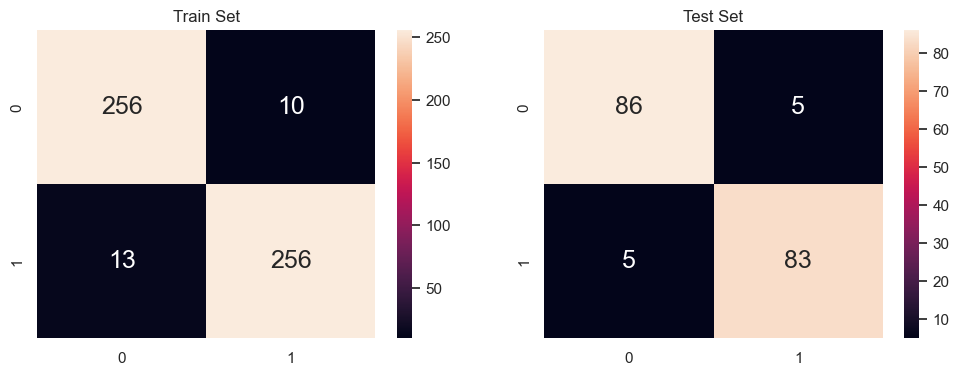

Train Data
Accuracy  :	 0.9570093457943926
TPR Train :	 0.9516728624535316
FNR Train :	 0.048327137546468404

Test Data
Accuracy  :	 0.9441340782122905
TPR Test :	 0.9431818181818182
FNR Test :	 0.056818181818181816



accuracy  f1_score  precision    recall  \
Logistic Regression (Feature List 0)  0.944134  0.943182   0.943182  0.943182   

                                      balanced_accuracy       FNR  
Logistic Regression (Feature List 0)           0.944118  0.056818

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

logModel = LogisticRegression()
x = data_up[feature_list[0]]
y = data_up['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 29) 
fnr = print_confusion(logModel, x_train, x_test, y_train, y_test)

result = evaluate_model(logModel, x_train, x_test, y_train, y_test, fnr)
result.index = ["Logistic Regression (Feature List 0)"]
comparison = pd.concat([comparison, result])
display(comparison)

### Hyperparameter tuning

In [60]:
param_grid = {
    'penalty' : ['l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg', 'liblinear', 'sag', 'saga'],
    'max_iter' : [100, 1000, 2500, 5000]
}

In [61]:
print(f'For feature list 1:')
x = data_up[feature_list[0]]
y = data_up['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 29)
hp_grid = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, scoring = 'accuracy', verbose = True)
hp_grid.fit(x_train, y_train)
print(hp_grid.best_estimator_)
print(hp_grid.best_params_)
print(hp_grid.best_score_)

For feature list 1:
Fitting 5 folds for each of 400 candidates, totalling 2000 fits


C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\thuva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\thuva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages

LogisticRegression(C=545.5594781168514, max_iter=1000)
{'C': 545.5594781168514, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
0.9626168224299064


In [62]:
print(f'For feature list 2:')
x = data_up[feature_list[1]]
y = data_up['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 29)
hp_grid = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, scoring = 'accuracy', verbose = True)
hp_grid.fit(x_train, y_train)
print(hp_grid.best_estimator_)
print(hp_grid.best_params_)
print(hp_grid.best_score_)

For feature list 2:
Fitting 5 folds for each of 400 candidates, totalling 2000 fits


C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

LogisticRegression(C=10000.0, solver='newton-cg')
{'C': 10000.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.9514018691588785


In [63]:
print(f'For feature list 3:')
x = data_up[feature_list[2]]
y = data_up['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 29)
hp_grid = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, scoring = 'accuracy', verbose = True)
hp_grid.fit(x_train, y_train)
print(hp_grid.best_estimator_)
print(hp_grid.best_params_)
print(hp_grid.best_score_)

For feature list 3:
Fitting 5 folds for each of 400 candidates, totalling 2000 fits


C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

LogisticRegression(C=545.5594781168514)
{'C': 545.5594781168514, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.9514018691588786


In [64]:
print(f'For feature list 4:')
x = data_up[feature_list[3]]
y = data_up['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 29)
hp_grid = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, scoring = 'accuracy', verbose = True)
hp_grid.fit(x_train, y_train)
print(hp_grid.best_estimator_)
print(hp_grid.best_params_)
print(hp_grid.best_score_)

For feature list 4:
Fitting 5 folds for each of 400 candidates, totalling 2000 fits


C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thuva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

LogisticRegression(C=0.23357214690901212, solver='liblinear')
{'C': 0.23357214690901212, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.9102803738317757


### Summary of tuning:
Found the optimal hyperparameters and the number of features to use in the model to provide the most optimal outcome provided the highest accuracy

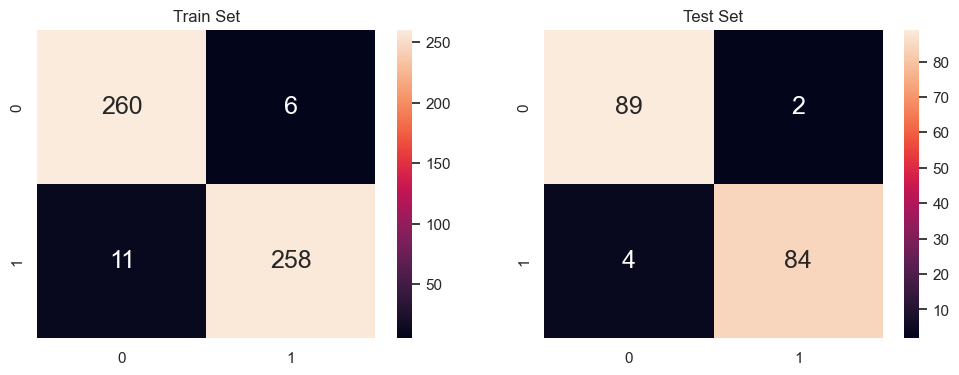

Train Data
Accuracy  :	 0.9682242990654205
TPR Train :	 0.9591078066914498
FNR Train :	 0.040892193308550186

Test Data
Accuracy  :	 0.9664804469273743
TPR Test :	 0.9545454545454546
FNR Test :	 0.045454545454545456



accuracy  f1_score  precision  \
Logistic Regression (Feature List 0)        0.944134  0.943182   0.943182   
Tuned Logistic Regression (Feature List 0)  0.966480  0.965517   0.976744   

                                              recall  balanced_accuracy  \
Logistic Regression (Feature List 0)        0.943182           0.944118   
Tuned Logistic Regression (Feature List 0)  0.954545           0.966284   

                                                 FNR  
Logistic Regression (Feature List 0)        0.056818  
Tuned Logistic Regression (Feature List 0)  0.045455

In [65]:
# Created another logistic regression model to apply the hyperparameters found earlier
logModel2 = LogisticRegression(C=545.5594781168514, max_iter=1000, penalty = 'l2', solver = 'lbfgs')
x = data_up[feature_list[0]]
y = data_up['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 29)
FNR = print_confusion(logModel2, x_train, x_test, y_train, y_test)

result = evaluate_model(logModel2, x_train, x_test, y_train, y_test, FNR)
result.index = ["Tuned Logistic Regression (Feature List 0)"]
comparison = pd.concat([comparison, result])
display(comparison)

After the hyperparameter tuning, we got the optimal hyperparameters for the logistic regression model

* Accuracy increased from 95.7% to 96.8% in the training set
* Accuracy increased from 94.4% to 96.6% in the test set
<br><br>
* False negative rate decreased from 0.0483 to 0.0409 in training set
* False negative rate decreased from 0.0568 to 0.0455 in test set

The false negative rate is more costly in this case, and it is great that there is a reduction in false negative rate 

## Binary Decision Tree  

We now want to test the accuracy of a Binary Decision Tree. 

> class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

The main parameter is `max_depth`. Fortunately, we do not need to find the optimal depth as by leaving it as `None`, the nodes will expand until all leaves are pure.

We will evaluate the accuracy of four different trees that have a different number of variables used. The tree with the highest predicition accuracy will be chosen. 

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
dectree = DecisionTreeClassifier(random_state = 29)

#### For feature list 0: 7 Best Features

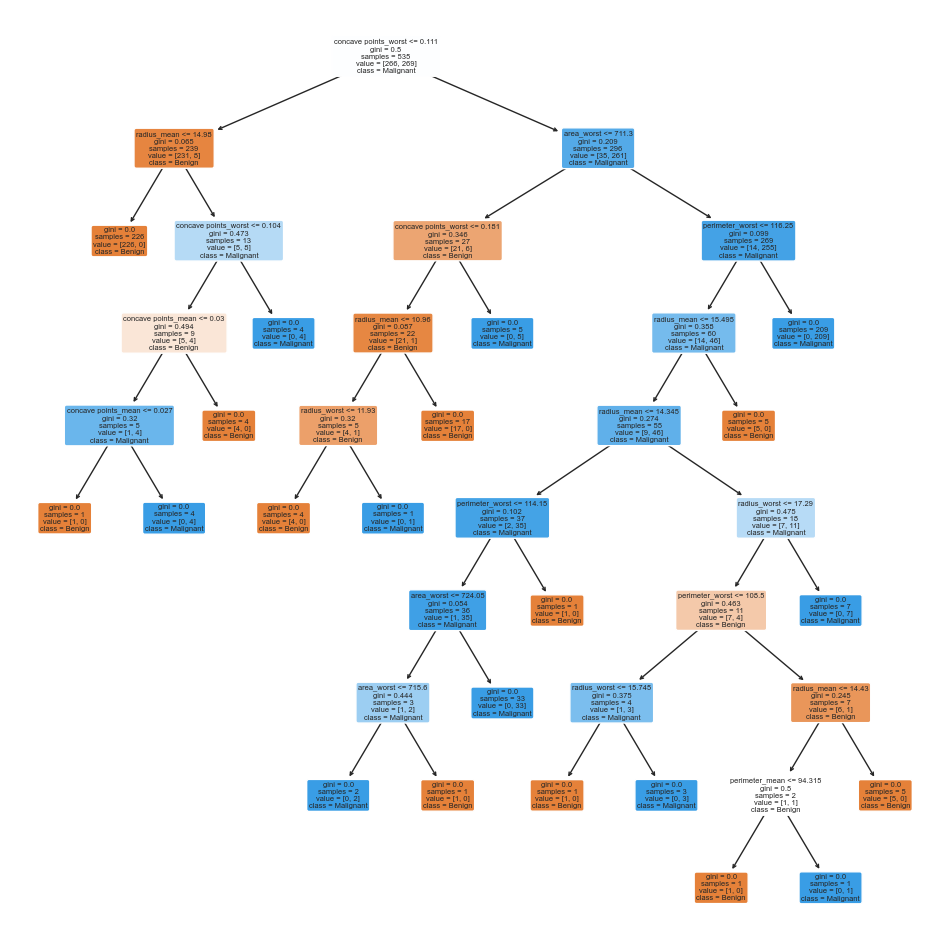

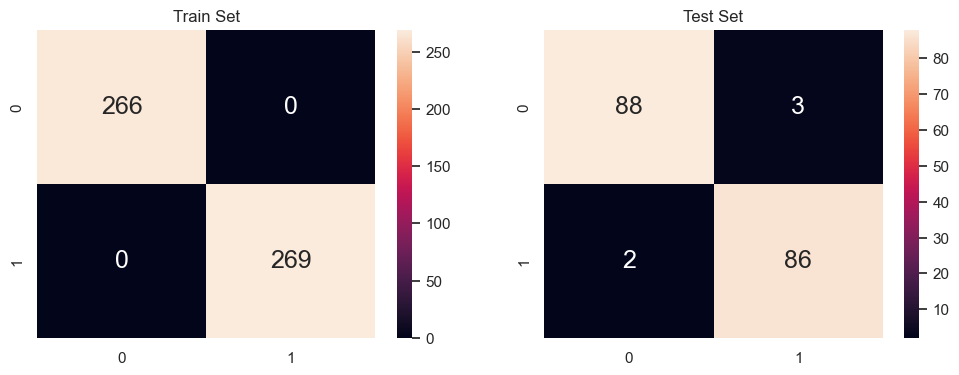

Train Data
Accuracy  :	 1.0
TPR Train :	 1.0
FNR Train :	 0.0

Test Data
Accuracy  :	 0.9720670391061452
TPR Test :	 0.9772727272727273
FNR Test :	 0.022727272727272728



accuracy  f1_score  precision  \
Logistic Regression (Feature List 0)        0.944134  0.943182   0.943182   
Tuned Logistic Regression (Feature List 0)  0.966480  0.965517   0.976744   
Decision Tree (Feature List 0)              0.972067  0.971751   0.966292   

                                              recall  balanced_accuracy  \
Logistic Regression (Feature List 0)        0.943182           0.944118   
Tuned Logistic Regression (Feature List 0)  0.954545           0.966284   
Decision Tree (Feature List 0)              0.977273           0.972153   

                                                 FNR  
Logistic Regression (Feature List 0)        0.056818  
Tuned Logistic Regression (Feature List 0)  0.045455  
Decision Tree (Feature List 0)              0.022727

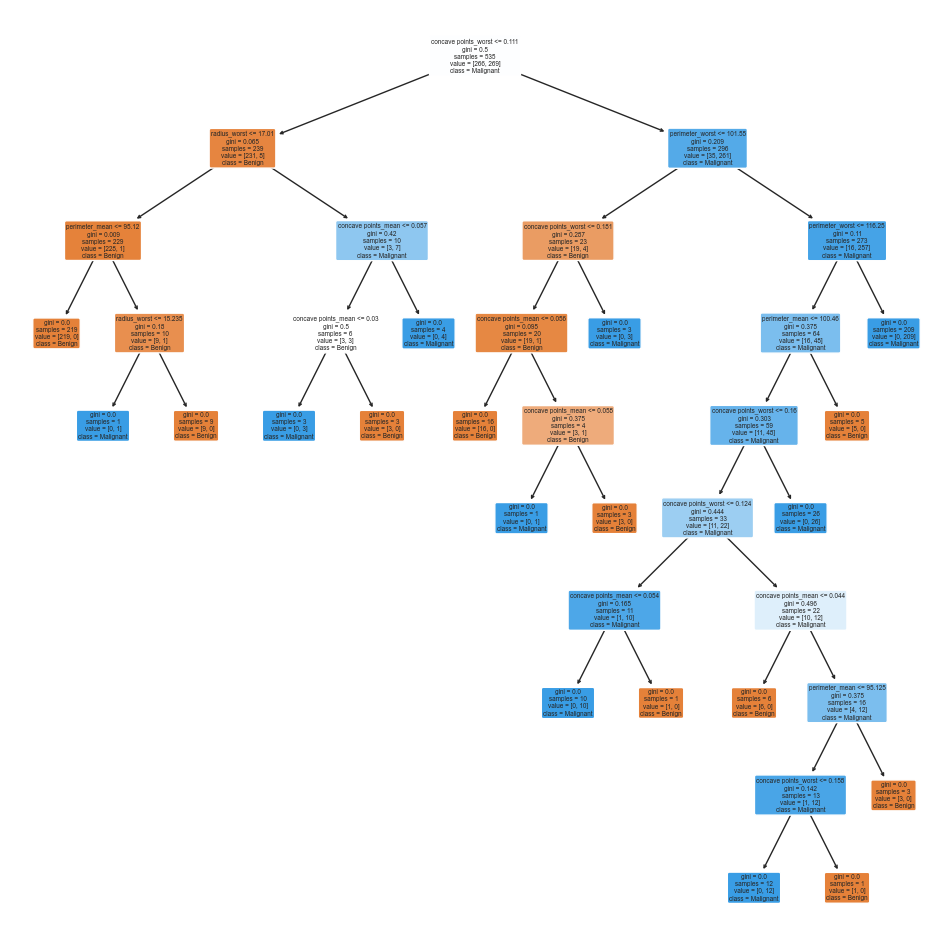

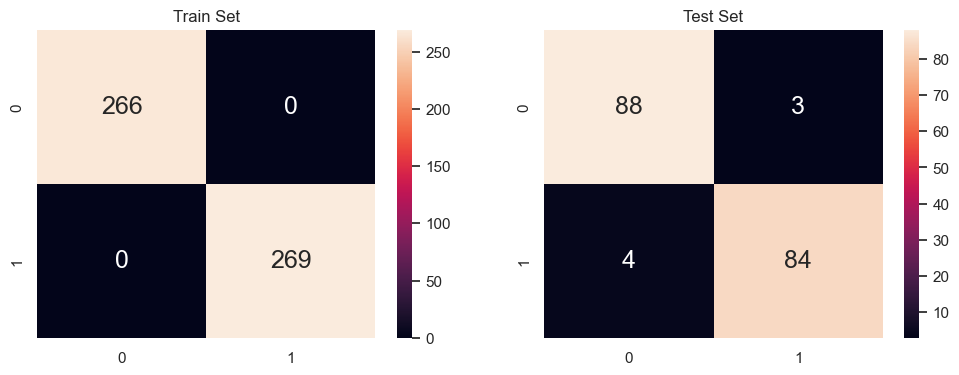

Train Data
Accuracy  :	 1.0
TPR Train :	 1.0
FNR Train :	 0.0

Test Data
Accuracy  :	 0.9608938547486033
TPR Test :	 0.9545454545454546
FNR Test :	 0.045454545454545456



accuracy  f1_score  precision  \
Logistic Regression (Feature List 0)        0.944134  0.943182   0.943182   
Tuned Logistic Regression (Feature List 0)  0.966480  0.965517   0.976744   
Decision Tree (Feature List 0)              0.972067  0.971751   0.966292   
Decision Tree (Feature List 1)              0.960894  0.960000   0.965517   

                                              recall  balanced_accuracy  \
Logistic Regression (Feature List 0)        0.943182           0.944118   
Tuned Logistic Regression (Feature List 0)  0.954545           0.966284   
Decision Tree (Feature List 0)              0.977273           0.972153   
Decision Tree (Feature List 1)              0.954545           0.960789   

                                                 FNR  
Logistic Regression (Feature List 0)        0.056818  
Tuned Logistic Regression (Feature List 0)  0.045455  
Decision Tree (Feature List 0)              0.022727  
Decision Tree (Feature List 1)              0.045455

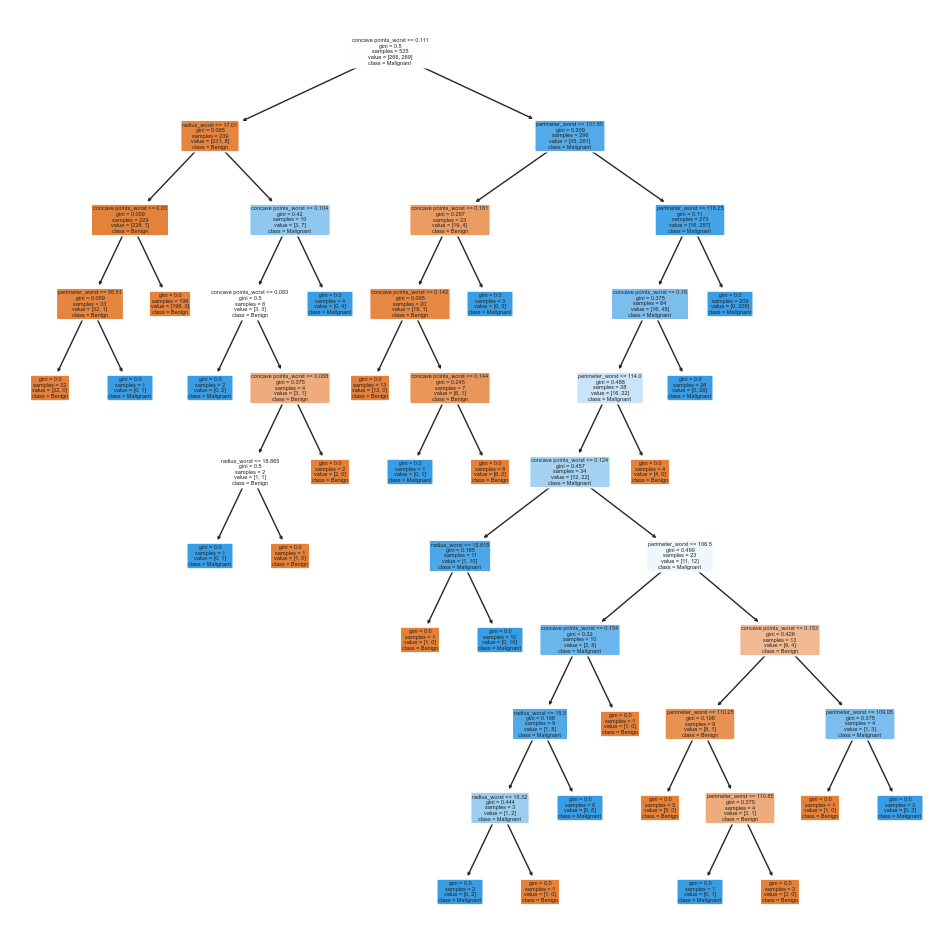

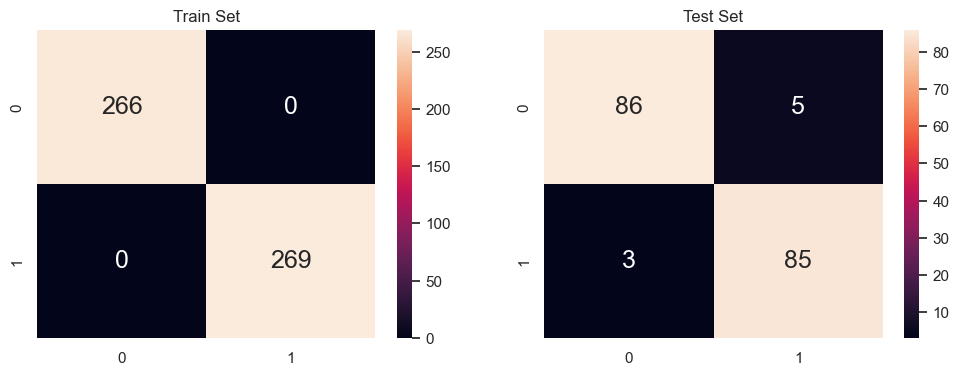

Train Data
Accuracy  :	 1.0
TPR Train :	 1.0
FNR Train :	 0.0

Test Data
Accuracy  :	 0.9553072625698324
TPR Test :	 0.9659090909090909
FNR Test :	 0.03409090909090909



accuracy  f1_score  precision  \
Logistic Regression (Feature List 0)        0.944134  0.943182   0.943182   
Tuned Logistic Regression (Feature List 0)  0.966480  0.965517   0.976744   
Decision Tree (Feature List 0)              0.972067  0.971751   0.966292   
Decision Tree (Feature List 1)              0.960894  0.960000   0.965517   
Decision Tree (Feature List 2)              0.955307  0.955056   0.944444   

                                              recall  balanced_accuracy  \
Logistic Regression (Feature List 0)        0.943182           0.944118   
Tuned Logistic Regression (Feature List 0)  0.954545           0.966284   
Decision Tree (Feature List 0)              0.977273           0.972153   
Decision Tree (Feature List 1)              0.954545           0.960789   
Decision Tree (Feature List 2)              0.965909           0.955482   

                                                 FNR  
Logistic Regression (Feature List 0)        0.056818  
Tuned Logistic Regression (Feature List 0)  0.045455  
Decision Tree (Feature List 0)              0.022727  
Decision Tree (Feature List 1)              0.045455  
Decision Tree (Feature List 2)              0.034091

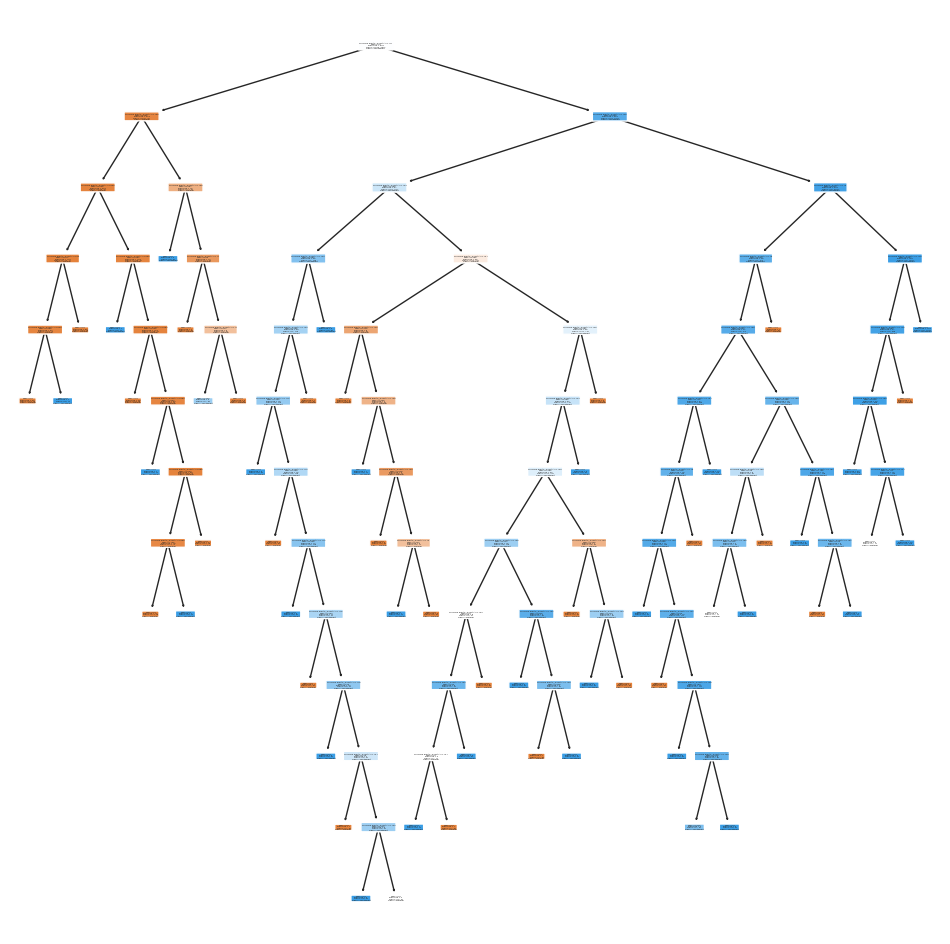

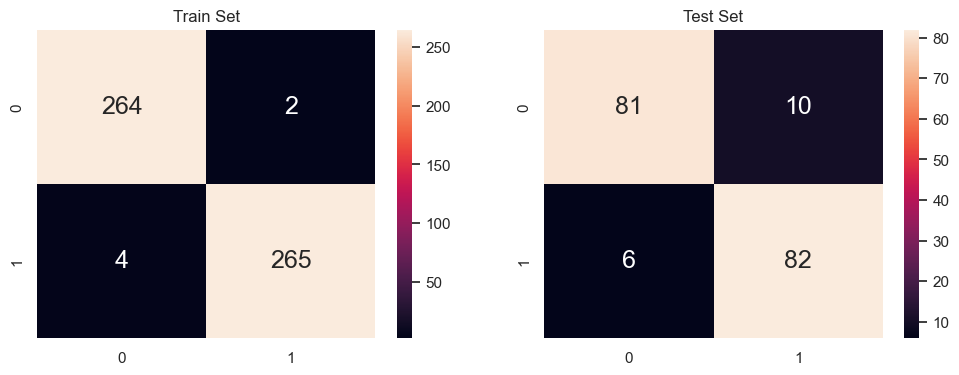

Train Data
Accuracy  :	 0.9887850467289719
TPR Train :	 0.9851301115241635
FNR Train :	 0.01486988847583643

Test Data
Accuracy  :	 0.9106145251396648
TPR Test :	 0.9318181818181818
FNR Test :	 0.06818181818181818



accuracy  f1_score  precision  \
Logistic Regression (Feature List 0)        0.944134  0.943182   0.943182   
Tuned Logistic Regression (Feature List 0)  0.966480  0.965517   0.976744   
Decision Tree (Feature List 0)              0.972067  0.971751   0.966292   
Decision Tree (Feature List 1)              0.960894  0.960000   0.965517   
Decision Tree (Feature List 2)              0.955307  0.955056   0.944444   
Decision Tree (Feature List 3)              0.910615  0.911111   0.891304   

                                              recall  balanced_accuracy  \
Logistic Regression (Feature List 0)        0.943182           0.944118   
Tuned Logistic Regression (Feature List 0)  0.954545           0.966284   
Decision Tree (Feature List 0)              0.977273           0.972153   
Decision Tree (Feature List 1)              0.954545           0.960789   
Decision Tree (Feature List 2)              0.965909           0.955482   
Decision Tree (Feature List 3)              0.931818           0.910964   

                                                 FNR  
Logistic Regression (Feature List 0)        0.056818  
Tuned Logistic Regression (Feature List 0)  0.045455  
Decision Tree (Feature List 0)              0.022727  
Decision Tree (Feature List 1)              0.045455  
Decision Tree (Feature List 2)              0.034091  
Decision Tree (Feature List 3)              0.068182

In [67]:
for index in range(0,4,1):
    x = data_up[feature_list[index]]
    y = data_up['diagnosis']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 29)
    dectree.fit(x_train, y_train)

    f = plt.figure(figsize=(12,12))
    plot_tree(dectree, filled = True, rounded = True, feature_names = x_train.columns.tolist(), class_names = ["Benign", "Malignant"])
    plt.show()

    FNR = print_confusion(dectree, x_train, x_test, y_train, y_test)
    result = evaluate_model(dectree, x_train, x_test, y_train, y_test, FNR)
    result.index = ["Decision Tree (Feature List {})".format(index)]
    comparison = pd.concat([comparison, result])
    display(comparison)

### Summary of Binary Decision Tree

When comparing the Classification Accuracy, True Positive Rate and False Positive Rate of the Test Sets of all four Decision Trees, 

The Decision Tree that used **Feature List 0** was the best 
* Accuracy : 0.9721
* TPR Test : 0.9773
* FNR Test : 0.0227

## Random Forest Classifier

We now want to test the accuracy of a Random Forest Model. 

Like the previous models we have executed, we will plot 4 different trees, each with different number of features used. 
The accuracy of these models will be displayed in a correlation matrix. 

The model with the highest accuracy will be chosen. 

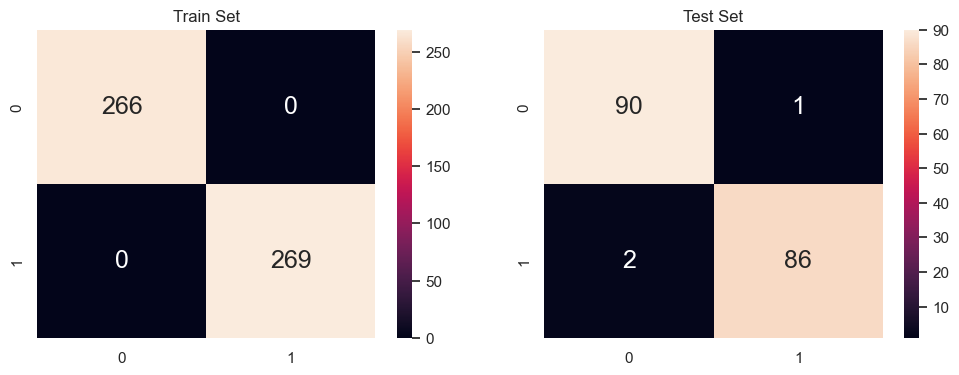

Train Data
Accuracy  :	 1.0
TPR Train :	 1.0
FNR Train :	 0.0

Test Data
Accuracy  :	 0.9832402234636871
TPR Test :	 0.9772727272727273
FNR Test :	 0.022727272727272728



accuracy  f1_score  precision  \
Logistic Regression (Feature List 0)        0.944134  0.943182   0.943182   
Tuned Logistic Regression (Feature List 0)  0.966480  0.965517   0.976744   
Decision Tree (Feature List 0)              0.972067  0.971751   0.966292   
Decision Tree (Feature List 1)              0.960894  0.960000   0.965517   
Decision Tree (Feature List 2)              0.955307  0.955056   0.944444   
Decision Tree (Feature List 3)              0.910615  0.911111   0.891304   
Random Forest (Feature List 0)              0.983240  0.982857   0.988506   

                                              recall  balanced_accuracy  \
Logistic Regression (Feature List 0)        0.943182           0.944118   
Tuned Logistic Regression (Feature List 0)  0.954545           0.966284   
Decision Tree (Feature List 0)              0.977273           0.972153   
Decision Tree (Feature List 1)              0.954545           0.960789   
Decision Tree (Feature List 2)              0.965909           0.955482   
Decision Tree (Feature List 3)              0.931818           0.910964   
Random Forest (Feature List 0)              0.977273           0.983142   

                                                 FNR  
Logistic Regression (Feature List 0)        0.056818  
Tuned Logistic Regression (Feature List 0)  0.045455  
Decision Tree (Feature List 0)              0.022727  
Decision Tree (Feature List 1)              0.045455  
Decision Tree (Feature List 2)              0.034091  
Decision Tree (Feature List 3)              0.068182  
Random Forest (Feature List 0)              0.022727

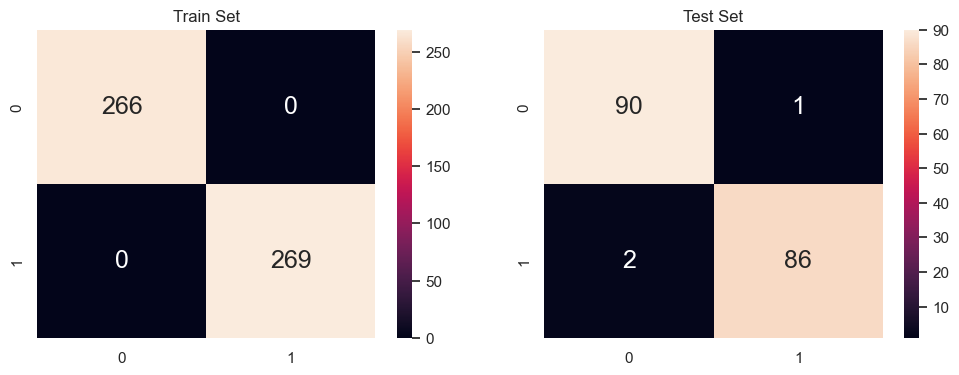

Train Data
Accuracy  :	 1.0
TPR Train :	 1.0
FNR Train :	 0.0

Test Data
Accuracy  :	 0.9832402234636871
TPR Test :	 0.9772727272727273
FNR Test :	 0.022727272727272728



accuracy  f1_score  precision  \
Logistic Regression (Feature List 0)        0.944134  0.943182   0.943182   
Tuned Logistic Regression (Feature List 0)  0.966480  0.965517   0.976744   
Decision Tree (Feature List 0)              0.972067  0.971751   0.966292   
Decision Tree (Feature List 1)              0.960894  0.960000   0.965517   
Decision Tree (Feature List 2)              0.955307  0.955056   0.944444   
Decision Tree (Feature List 3)              0.910615  0.911111   0.891304   
Random Forest (Feature List 0)              0.983240  0.982857   0.988506   
Random Forest (Feature List 1)              0.983240  0.982857   0.988506   

                                              recall  balanced_accuracy  \
Logistic Regression (Feature List 0)        0.943182           0.944118   
Tuned Logistic Regression (Feature List 0)  0.954545           0.966284   
Decision Tree (Feature List 0)              0.977273           0.972153   
Decision Tree (Feature List 1)              0.954545           0.960789   
Decision Tree (Feature List 2)              0.965909           0.955482   
Decision Tree (Feature List 3)              0.931818           0.910964   
Random Forest (Feature List 0)              0.977273           0.983142   
Random Forest (Feature List 1)              0.977273           0.983142   

                                                 FNR  
Logistic Regression (Feature List 0)        0.056818  
Tuned Logistic Regression (Feature List 0)  0.045455  
Decision Tree (Feature List 0)              0.022727  
Decision Tree (Feature List 1)              0.045455  
Decision Tree (Feature List 2)              0.034091  
Decision Tree (Feature List 3)              0.068182  
Random Forest (Feature List 0)              0.022727  
Random Forest (Feature List 1)              0.022727

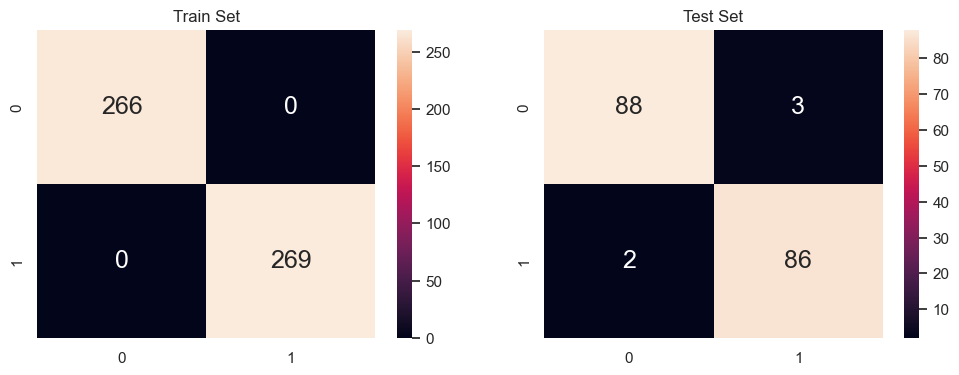

Train Data
Accuracy  :	 1.0
TPR Train :	 1.0
FNR Train :	 0.0

Test Data
Accuracy  :	 0.9720670391061452
TPR Test :	 0.9772727272727273
FNR Test :	 0.022727272727272728



accuracy  f1_score  precision  \
Logistic Regression (Feature List 0)        0.944134  0.943182   0.943182   
Tuned Logistic Regression (Feature List 0)  0.966480  0.965517   0.976744   
Decision Tree (Feature List 0)              0.972067  0.971751   0.966292   
Decision Tree (Feature List 1)              0.960894  0.960000   0.965517   
Decision Tree (Feature List 2)              0.955307  0.955056   0.944444   
Decision Tree (Feature List 3)              0.910615  0.911111   0.891304   
Random Forest (Feature List 0)              0.983240  0.982857   0.988506   
Random Forest (Feature List 1)              0.983240  0.982857   0.988506   
Random Forest (Feature List 2)              0.972067  0.971751   0.966292   

                                              recall  balanced_accuracy  \
Logistic Regression (Feature List 0)        0.943182           0.944118   
Tuned Logistic Regression (Feature List 0)  0.954545           0.966284   
Decision Tree (Feature List 0)              0.977273           0.972153   
Decision Tree (Feature List 1)              0.954545           0.960789   
Decision Tree (Feature List 2)              0.965909           0.955482   
Decision Tree (Feature List 3)              0.931818           0.910964   
Random Forest (Feature List 0)              0.977273           0.983142   
Random Forest (Feature List 1)              0.977273           0.983142   
Random Forest (Feature List 2)              0.977273           0.972153   

                                                 FNR  
Logistic Regression (Feature List 0)        0.056818  
Tuned Logistic Regression (Feature List 0)  0.045455  
Decision Tree (Feature List 0)              0.022727  
Decision Tree (Feature List 1)              0.045455  
Decision Tree (Feature List 2)              0.034091  
Decision Tree (Feature List 3)              0.068182  
Random Forest (Feature List 0)              0.022727  
Random Forest (Feature List 1)              0.022727  
Random Forest (Feature List 2)              0.022727

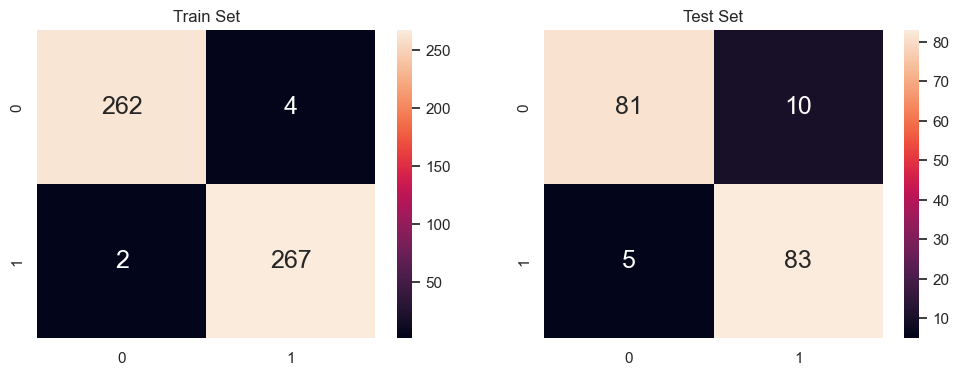

Train Data
Accuracy  :	 0.9887850467289719
TPR Train :	 0.9925650557620818
FNR Train :	 0.007434944237918215

Test Data
Accuracy  :	 0.9162011173184358
TPR Test :	 0.9431818181818182
FNR Test :	 0.056818181818181816



accuracy  f1_score  precision  \
Logistic Regression (Feature List 0)        0.944134  0.943182   0.943182   
Tuned Logistic Regression (Feature List 0)  0.966480  0.965517   0.976744   
Decision Tree (Feature List 0)              0.972067  0.971751   0.966292   
Decision Tree (Feature List 1)              0.960894  0.960000   0.965517   
Decision Tree (Feature List 2)              0.955307  0.955056   0.944444   
Decision Tree (Feature List 3)              0.910615  0.911111   0.891304   
Random Forest (Feature List 0)              0.983240  0.982857   0.988506   
Random Forest (Feature List 1)              0.983240  0.982857   0.988506   
Random Forest (Feature List 2)              0.972067  0.971751   0.966292   
Random Forest (Feature List 3)              0.916201  0.917127   0.892473   

                                              recall  balanced_accuracy  \
Logistic Regression (Feature List 0)        0.943182           0.944118   
Tuned Logistic Regression (Feature List 0)  0.954545           0.966284   
Decision Tree (Feature List 0)              0.977273           0.972153   
Decision Tree (Feature List 1)              0.954545           0.960789   
Decision Tree (Feature List 2)              0.965909           0.955482   
Decision Tree (Feature List 3)              0.931818           0.910964   
Random Forest (Feature List 0)              0.977273           0.983142   
Random Forest (Feature List 1)              0.977273           0.983142   
Random Forest (Feature List 2)              0.977273           0.972153   
Random Forest (Feature List 3)              0.943182           0.916646   

                                                 FNR  
Logistic Regression (Feature List 0)        0.056818  
Tuned Logistic Regression (Feature List 0)  0.045455  
Decision Tree (Feature List 0)              0.022727  
Decision Tree (Feature List 1)              0.045455  
Decision Tree (Feature List 2)              0.034091  
Decision Tree (Feature List 3)              0.068182  
Random Forest (Feature List 0)              0.022727  
Random Forest (Feature List 1)              0.022727  
Random Forest (Feature List 2)              0.022727  
Random Forest (Feature List 3)              0.056818

In [68]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, random_state = 29)

for index in range(0,4,1): 
    x = data_up[feature_list[index]]
    y = data_up['diagnosis']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 29)
    classifier.fit(x_train, y_train)
    y_test_pred = classifier.predict(x_test)
    
    FNR = print_confusion(classifier, x_train, x_test, y_train, y_test) #calling previously defined function
    result = evaluate_model(classifier, x_train, x_test, y_train, y_test, FNR)
    result.index = ["Random Forest (Feature List {})".format(index)]
    comparison = pd.concat([comparison, result])
    display(comparison)

### Summary

As seen by the correlation matrix above, and the **Best Random Forest Model** is the model that used **Feature list 0 and 1** that has the **7 and 5 best features**. 

This can be seen by the model having an **Accuracy of 0.9832** and a **False Negative Rate of  0.0227**. 


**Point to Note:**
Though the difference in accuracy between the model that used feature list 1 and the model that used feature list 2 is very marginal, due to the nature of our data set, having even a slight increase in accuracy in predicting breast cancer can make a great difference to those affected as it can allow for earlier treatment. 

## Nearest Neighbours Classification
We will finally model using the KNeighbours Classifier, the function is as defined:

> class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

The key parameter that we will want to tune is `n_neighbors`, which is the `Number of neighbors to use by default for kneighbors queries`. Since this is a single parameter, we can tune it easily iteratively without using GridSearchCV


https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

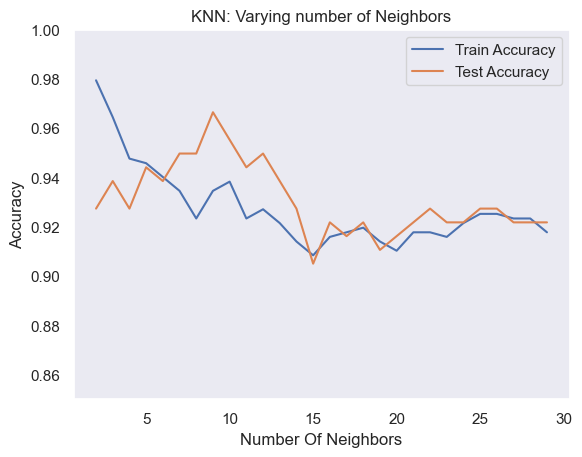

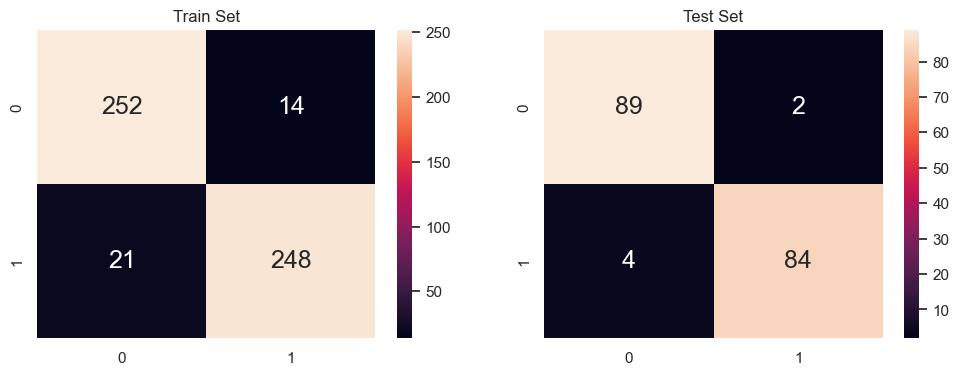

Train Data
Accuracy  :	 0.9345794392523364
TPR Train :	 0.9219330855018587
FNR Train :	 0.07806691449814127

Test Data
Accuracy  :	 0.9664804469273743
TPR Test :	 0.9545454545454546
FNR Test :	 0.045454545454545456



accuracy  f1_score  precision  \
Logistic Regression (Feature List 0)        0.944134  0.943182   0.943182   
Tuned Logistic Regression (Feature List 0)  0.966480  0.965517   0.976744   
Decision Tree (Feature List 0)              0.972067  0.971751   0.966292   
Decision Tree (Feature List 1)              0.960894  0.960000   0.965517   
Decision Tree (Feature List 2)              0.955307  0.955056   0.944444   
Decision Tree (Feature List 3)              0.910615  0.911111   0.891304   
Random Forest (Feature List 0)              0.983240  0.982857   0.988506   
Random Forest (Feature List 1)              0.983240  0.982857   0.988506   
Random Forest (Feature List 2)              0.972067  0.971751   0.966292   
Random Forest (Feature List 3)              0.916201  0.917127   0.892473   
KNearNeighbours (Feature List 0)            0.966480  0.965517   0.976744   

                                              recall  balanced_accuracy  \
Logistic Regression (Feature List 0)        0.943182           0.944118   
Tuned Logistic Regression (Feature List 0)  0.954545           0.966284   
Decision Tree (Feature List 0)              0.977273           0.972153   
Decision Tree (Feature List 1)              0.954545           0.960789   
Decision Tree (Feature List 2)              0.965909           0.955482   
Decision Tree (Feature List 3)              0.931818           0.910964   
Random Forest (Feature List 0)              0.977273           0.983142   
Random Forest (Feature List 1)              0.977273           0.983142   
Random Forest (Feature List 2)              0.977273           0.972153   
Random Forest (Feature List 3)              0.943182           0.916646   
KNearNeighbours (Feature List 0)            0.954545           0.966284   

                                                 FNR  
Logistic Regression (Feature List 0)        0.056818  
Tuned Logistic Regression (Feature List 0)  0.045455  
Decision Tree (Feature List 0)              0.022727  
Decision Tree (Feature List 1)              0.045455  
Decision Tree (Feature List 2)              0.034091  
Decision Tree (Feature List 3)              0.068182  
Random Forest (Feature List 0)              0.022727  
Random Forest (Feature List 1)              0.022727  
Random Forest (Feature List 2)              0.022727  
Random Forest (Feature List 3)              0.056818  
KNearNeighbours (Feature List 0)            0.045455

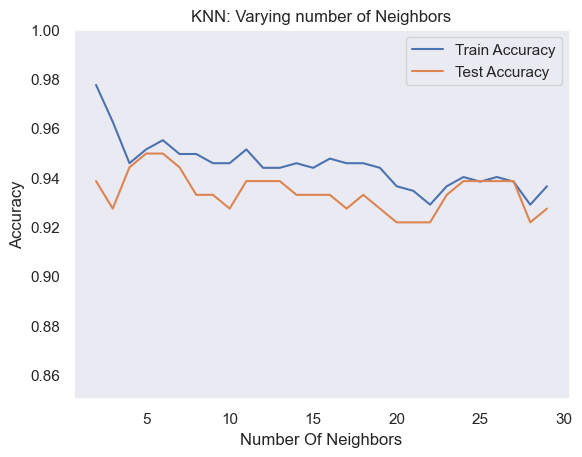

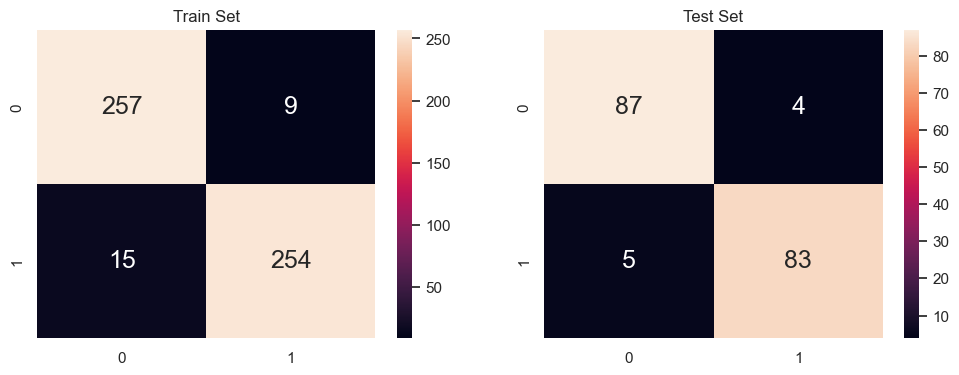

Train Data
Accuracy  :	 0.9551401869158879
TPR Train :	 0.9442379182156134
FNR Train :	 0.055762081784386616

Test Data
Accuracy  :	 0.9497206703910615
TPR Test :	 0.9431818181818182
FNR Test :	 0.056818181818181816



accuracy  f1_score  precision  \
Logistic Regression (Feature List 0)        0.944134  0.943182   0.943182   
Tuned Logistic Regression (Feature List 0)  0.966480  0.965517   0.976744   
Decision Tree (Feature List 0)              0.972067  0.971751   0.966292   
Decision Tree (Feature List 1)              0.960894  0.960000   0.965517   
Decision Tree (Feature List 2)              0.955307  0.955056   0.944444   
Decision Tree (Feature List 3)              0.910615  0.911111   0.891304   
Random Forest (Feature List 0)              0.983240  0.982857   0.988506   
Random Forest (Feature List 1)              0.983240  0.982857   0.988506   
Random Forest (Feature List 2)              0.972067  0.971751   0.966292   
Random Forest (Feature List 3)              0.916201  0.917127   0.892473   
KNearNeighbours (Feature List 0)            0.966480  0.965517   0.976744   
KNearNeighbours (Feature List 1)            0.949721  0.948571   0.954023   

                                              recall  balanced_accuracy  \
Logistic Regression (Feature List 0)        0.943182           0.944118   
Tuned Logistic Regression (Feature List 0)  0.954545           0.966284   
Decision Tree (Feature List 0)              0.977273           0.972153   
Decision Tree (Feature List 1)              0.954545           0.960789   
Decision Tree (Feature List 2)              0.965909           0.955482   
Decision Tree (Feature List 3)              0.931818           0.910964   
Random Forest (Feature List 0)              0.977273           0.983142   
Random Forest (Feature List 1)              0.977273           0.983142   
Random Forest (Feature List 2)              0.977273           0.972153   
Random Forest (Feature List 3)              0.943182           0.916646   
KNearNeighbours (Feature List 0)            0.954545           0.966284   
KNearNeighbours (Feature List 1)            0.943182           0.949613   

                                                 FNR  
Logistic Regression (Feature List 0)        0.056818  
Tuned Logistic Regression (Feature List 0)  0.045455  
Decision Tree (Feature List 0)              0.022727  
Decision Tree (Feature List 1)              0.045455  
Decision Tree (Feature List 2)              0.034091  
Decision Tree (Feature List 3)              0.068182  
Random Forest (Feature List 0)              0.022727  
Random Forest (Feature List 1)              0.022727  
Random Forest (Feature List 2)              0.022727  
Random Forest (Feature List 3)              0.056818  
KNearNeighbours (Feature List 0)            0.045455  
KNearNeighbours (Feature List 1)            0.056818

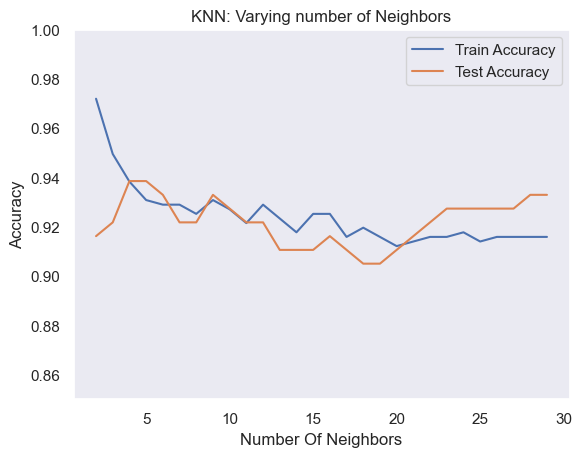

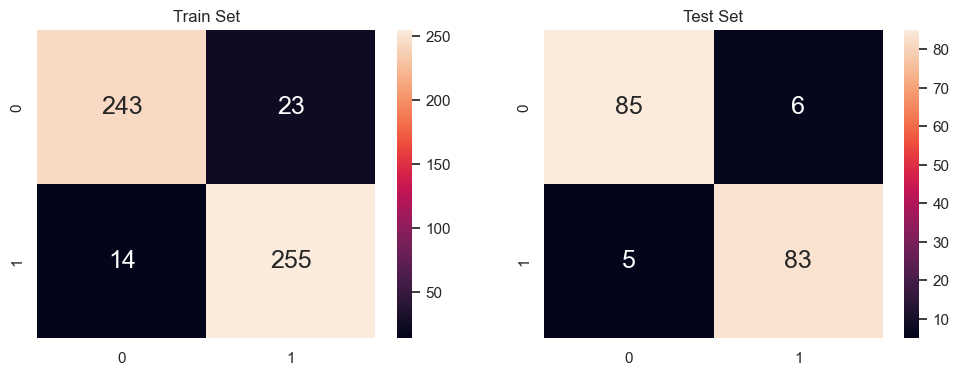

Train Data
Accuracy  :	 0.930841121495327
TPR Train :	 0.9479553903345725
FNR Train :	 0.05204460966542751

Test Data
Accuracy  :	 0.9385474860335196
TPR Test :	 0.9431818181818182
FNR Test :	 0.056818181818181816



accuracy  f1_score  precision  \
Logistic Regression (Feature List 0)        0.944134  0.943182   0.943182   
Tuned Logistic Regression (Feature List 0)  0.966480  0.965517   0.976744   
Decision Tree (Feature List 0)              0.972067  0.971751   0.966292   
Decision Tree (Feature List 1)              0.960894  0.960000   0.965517   
Decision Tree (Feature List 2)              0.955307  0.955056   0.944444   
Decision Tree (Feature List 3)              0.910615  0.911111   0.891304   
Random Forest (Feature List 0)              0.983240  0.982857   0.988506   
Random Forest (Feature List 1)              0.983240  0.982857   0.988506   
Random Forest (Feature List 2)              0.972067  0.971751   0.966292   
Random Forest (Feature List 3)              0.916201  0.917127   0.892473   
KNearNeighbours (Feature List 0)            0.966480  0.965517   0.976744   
KNearNeighbours (Feature List 1)            0.949721  0.948571   0.954023   
KNearNeighbours (Feature List 2)            0.938547  0.937853   0.932584   

                                              recall  balanced_accuracy  \
Logistic Regression (Feature List 0)        0.943182           0.944118   
Tuned Logistic Regression (Feature List 0)  0.954545           0.966284   
Decision Tree (Feature List 0)              0.977273           0.972153   
Decision Tree (Feature List 1)              0.954545           0.960789   
Decision Tree (Feature List 2)              0.965909           0.955482   
Decision Tree (Feature List 3)              0.931818           0.910964   
Random Forest (Feature List 0)              0.977273           0.983142   
Random Forest (Feature List 1)              0.977273           0.983142   
Random Forest (Feature List 2)              0.977273           0.972153   
Random Forest (Feature List 3)              0.943182           0.916646   
KNearNeighbours (Feature List 0)            0.954545           0.966284   
KNearNeighbours (Feature List 1)            0.943182           0.949613   
KNearNeighbours (Feature List 2)            0.943182           0.938624   

                                                 FNR  
Logistic Regression (Feature List 0)        0.056818  
Tuned Logistic Regression (Feature List 0)  0.045455  
Decision Tree (Feature List 0)              0.022727  
Decision Tree (Feature List 1)              0.045455  
Decision Tree (Feature List 2)              0.034091  
Decision Tree (Feature List 3)              0.068182  
Random Forest (Feature List 0)              0.022727  
Random Forest (Feature List 1)              0.022727  
Random Forest (Feature List 2)              0.022727  
Random Forest (Feature List 3)              0.056818  
KNearNeighbours (Feature List 0)            0.045455  
KNearNeighbours (Feature List 1)            0.056818  
KNearNeighbours (Feature List 2)            0.056818

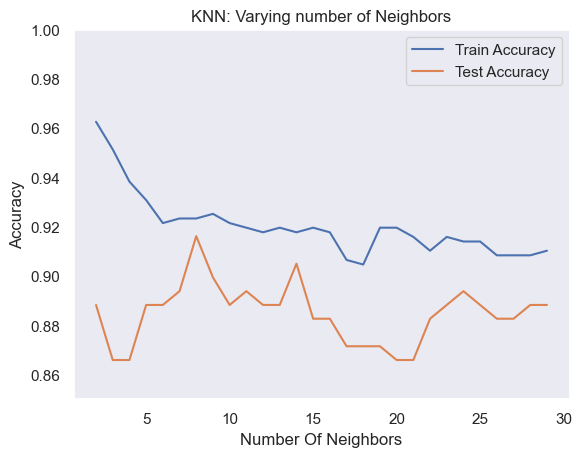

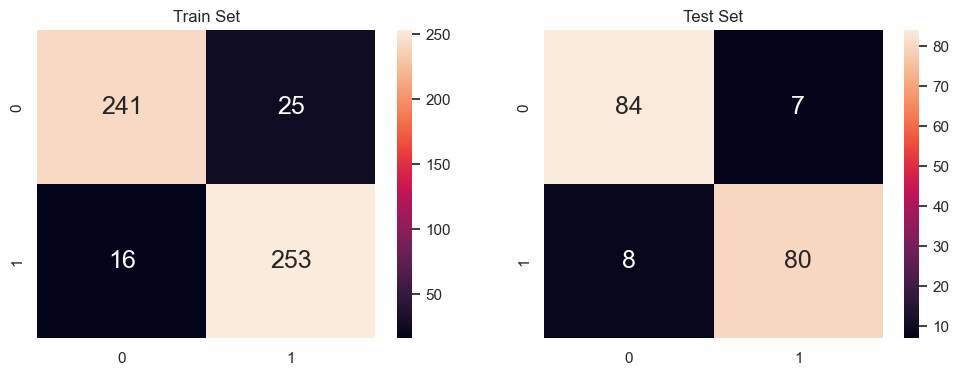

Train Data
Accuracy  :	 0.9233644859813084
TPR Train :	 0.9405204460966543
FNR Train :	 0.05947955390334572

Test Data
Accuracy  :	 0.9162011173184358
TPR Test :	 0.9090909090909091
FNR Test :	 0.09090909090909091



accuracy  f1_score  precision  \
Logistic Regression (Feature List 0)        0.944134  0.943182   0.943182   
Tuned Logistic Regression (Feature List 0)  0.966480  0.965517   0.976744   
Decision Tree (Feature List 0)              0.972067  0.971751   0.966292   
Decision Tree (Feature List 1)              0.960894  0.960000   0.965517   
Decision Tree (Feature List 2)              0.955307  0.955056   0.944444   
Decision Tree (Feature List 3)              0.910615  0.911111   0.891304   
Random Forest (Feature List 0)              0.983240  0.982857   0.988506   
Random Forest (Feature List 1)              0.983240  0.982857   0.988506   
Random Forest (Feature List 2)              0.972067  0.971751   0.966292   
Random Forest (Feature List 3)              0.916201  0.917127   0.892473   
KNearNeighbours (Feature List 0)            0.966480  0.965517   0.976744   
KNearNeighbours (Feature List 1)            0.949721  0.948571   0.954023   
KNearNeighbours (Feature List 2)            0.938547  0.937853   0.932584   
KNearNeighbours (Feature List 3)            0.916201  0.914286   0.919540   

                                              recall  balanced_accuracy  \
Logistic Regression (Feature List 0)        0.943182           0.944118   
Tuned Logistic Regression (Feature List 0)  0.954545           0.966284   
Decision Tree (Feature List 0)              0.977273           0.972153   
Decision Tree (Feature List 1)              0.954545           0.960789   
Decision Tree (Feature List 2)              0.965909           0.955482   
Decision Tree (Feature List 3)              0.931818           0.910964   
Random Forest (Feature List 0)              0.977273           0.983142   
Random Forest (Feature List 1)              0.977273           0.983142   
Random Forest (Feature List 2)              0.977273           0.972153   
Random Forest (Feature List 3)              0.943182           0.916646   
KNearNeighbours (Feature List 0)            0.954545           0.966284   
KNearNeighbours (Feature List 1)            0.943182           0.949613   
KNearNeighbours (Feature List 2)            0.943182           0.938624   
KNearNeighbours (Feature List 3)            0.909091           0.916084   

                                                 FNR  
Logistic Regression (Feature List 0)        0.056818  
Tuned Logistic Regression (Feature List 0)  0.045455  
Decision Tree (Feature List 0)              0.022727  
Decision Tree (Feature List 1)              0.045455  
Decision Tree (Feature List 2)              0.034091  
Decision Tree (Feature List 3)              0.068182  
Random Forest (Feature List 0)              0.022727  
Random Forest (Feature List 1)              0.022727  
Random Forest (Feature List 2)              0.022727  
Random Forest (Feature List 3)              0.056818  
KNearNeighbours (Feature List 0)            0.045455  
KNearNeighbours (Feature List 1)            0.056818  
KNearNeighbours (Feature List 2)            0.056818  
KNearNeighbours (Feature List 3)            0.090909

In [70]:
for index in range(0,4,1):
    x = data_up[feature_list[index]]
    y = data_up['diagnosis']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 29)
    train_score = {}
    test_score = {}
    n_neighbors = np.arange(2, 30, 1)
    for neighbor in n_neighbors:
        knn = KNeighborsClassifier(n_neighbors=neighbor)
        knn.fit(x_train, y_train)
        train_score[neighbor]=knn.score(x_train, y_train)
        test_score[neighbor]=knn.score(x_test, y_test)
    plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
    plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
    plt.xlabel("Number Of Neighbors")
    plt.ylabel("Accuracy")
    plt.title("KNN: Varying number of Neighbors")
    plt.legend()
    plt.ylim(0.85, 1.00)
    plt.grid()
    plt.show()

    for key, value in test_score.items():
        if value==max(test_score.values()):
            bestkey = key

    KNN = KNeighborsClassifier(n_neighbors=bestkey)
    FNR = print_confusion(KNN, x_train, x_test, y_train, y_test)
    result = evaluate_model(KNN, x_train, x_test, y_train, y_test, FNR)
    result.index = ["KNearNeighbours (Feature List {})".format(index)]
    comparison = pd.concat([comparison, result])
    display(comparison)

# Conclusion

In [71]:
comparison.sort_values(by='accuracy', ascending = False).style.background_gradient(cmap='Reds')

From our comparsion dataframe, we can see that `Random Forest` with `Feature List 0 and 1` has the highest accuracy among all the models and feature list. This could imply that there may exist `2 features` that has no impact on the response or that it is the same as some other features in the list.